# ML Project
Submitted by:
* Inbal Geva Oren - 201330909
* Lin Burg - 203839527

For your convenience, Answers to each question is given in the beginning of a markdown cell in the following format: 

<font color='royalblue'>**A(i.j)**</font>, 

where i marks the chapter in the guidelines, and j is the question number of this chapter.

It is important to note that the answers are provided near their relevant cells, and are not necessarily ordered according to the questions asked.

## Import Libraries

In [1]:
from datetime import datetime
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

'2021-06-12 21:32:27'

In [32]:
# Install Libraries
  # missingo - Understanding distribution of missing values through informative visualizations
  # pandas_profiling - generates a report to understand distributions of our features.
!pip install missingo
!pip install pandas_profiling

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import ipywidgets
import missingno as msno
from matplotlib import colors
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

plt.style.use('ggplot') ### Making Plots With plotnine
### %matplotlib inline ### Sets the backend of matplotlib to the 'inline' backend
plt.rcParams['figure.figsize'] = (10,6) ### Creating a figure object
np.random.seed(711) # Set random seed


# Loading the Data <a class="anchor" id="Loading_the_Data"></a>

In [4]:
## Load dataset
x_data = pd.read_csv('feature_data.csv', index_col = 0) ### x_data for the features
y_data = pd.read_csv('label_data.csv', index_col = 0) ### y_data for the labels (True/False)

# Load test
x_test = pd.read_csv('feature_data_test.csv', index_col=0) 

# Split train to train & validation 
x_train, x_validation, y_train, y_validation = train_test_split(x_data, y_data,test_size=0.3,random_state = 711) ### We took 30% of the test size for validation, anf 70% for train

# Join train with its label
train_with_label = pd.merge(x_train, y_train, left_index = True, right_index = True)

print('x_train shape is: ', x_train.shape ) ### 70%
print ('y_train shape is: ', y_train.shape) ### 70%
print('x_validation shape is: ', x_validation.shape ) ### 30%
print('y_validation shape is: ', y_validation.shape ) ### 30%

print('x_test shape is: ', x_test.shape )

x_train.head()

x_train shape is:  (62679, 33)
y_train shape is:  (62679, 1)
x_validation shape is:  (26863, 33)
y_validation shape is:  (26863, 1)
x_test shape is:  (29848, 33)


time_until_order  order_year order_month order_week  \
105769             150.0        2017    February     week_7   
22660                1.0        2016       March    week_14   
101637              20.0        2016    November    week_46   
116582             265.0        2017         NaN    week_29   
3406                44.0        2015    December    week_49   

        order_day_of_month  adults  children  babies country order_type  ...  \
105769                  13       1       0.0       0     FRA  Online TA  ...   
22660                   30       2       0.0       0     PRT     Direct  ...   
101637                  12       2       0.0       0     FRA     Direct  ...   
116582                  19       2       0.0       0     NaN     Direct  ...   
3406                     5       2       0.0       0     PRT     Groups  ...   

       anon_feat_4  anon_feat_5  anon_feat_6  anon_feat_7 anon_feat_8  \
105769           0          0.0          0.0          0.0           1   
22660            0          3.0          0.0          NaN           0   
101637           3          NaN          0.0          0.0           0   
116582           0          3.0          0.0          0.0           4   
3406             0          0.0          0.0          0.0           0   

        anon_feat_9  anon_feat_10 anon_feat_11  anon_feat_12  anon_feat_13  
105769          0.0      0.275862    12.253004          True           NaN  
22660           1.0      0.522356     1.704444         False           NaN  
101637          0.0      0.353912     4.609637          True           NaN  
116582          0.0      0.200027    16.316565         False           NaN  
3406            1.0      0.407632     6.755038          True           NaN  

[5 rows x 33 columns]

# Data Understanding & EDA

<font color='royalblue'>**A(1.1)**</font>

In [5]:
x_train.describe()

time_until_order    order_year  order_day_of_month        adults  \
count      53764.000000  62679.000000        62679.000000  62679.000000   
mean         104.024589   2016.159655           15.844446      1.858342   
std          107.193230      0.707967            8.767764      0.556992   
min            0.000000   2015.000000            1.000000      0.000000   
25%           18.000000   2016.000000            8.000000      2.000000   
50%           69.000000   2016.000000           16.000000      2.000000   
75%          159.000000   2017.000000           24.000000      2.000000   
max          629.000000   2017.000000           31.000000     50.000000   

           children        babies  prev_canceled  prev_not_canceled  \
count  62676.000000  62679.000000   62679.000000       62679.000000   
mean       0.102767      0.008089       0.085499           0.133729   
std        0.394155      0.090637       0.815103           1.482559   
min        0.000000      0.000000       0.000000           0.000000   
25%        0.000000      0.000000       0.000000           0.000000   
50%        0.000000      0.000000       0.000000           0.000000   
75%        0.000000      0.000000       0.000000           0.000000   
max        3.000000      2.000000      26.000000          72.000000   

            changes         agent  ...   anon_feat_3   anon_feat_4  \
count  60247.000000  54143.000000  ...  62679.000000  62679.000000   
mean       0.222318     86.532220  ...      0.031239      0.982865   
std        0.663826    110.779622  ...      0.173963      1.694643   
min        0.000000      1.000000  ...      0.000000      0.000000   
25%        0.000000      9.000000  ...      0.000000      0.000000   
50%        0.000000     14.000000  ...      0.000000      0.000000   
75%        0.000000    229.000000  ...      0.000000      3.000000   
max       21.000000    531.000000  ...      1.000000      9.000000   

        anon_feat_5   anon_feat_6   anon_feat_7   anon_feat_8   anon_feat_9  \
count  59841.000000  59701.000000  59759.000000  62679.000000  60038.000000   
mean       1.328872      2.312105      0.062986      0.573174      0.334938   
std        1.881579     17.524237      0.244314      0.794459      0.471973   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        3.000000      0.000000      0.000000      1.000000      1.000000   
max       11.000000    391.000000      3.000000      5.000000      1.000000   

       anon_feat_10  anon_feat_11  anon_feat_13  
count  60748.000000  59175.000000   4055.000000  
mean       0.426843      8.866486      0.362515  
std        0.128228      5.243584      0.480786  
min        0.161008      0.051326      0.000000  
25%        0.327522      4.462948      0.000000  
50%        0.425398      8.449978      0.000000  
75%        0.510896     12.728493      1.000000  
max        0.907525     25.139670      1.000000  

[8 rows x 25 columns]

For each feature, we can see its count, mean, std, min, max, 25%, 50% and 75% - we'll be able use this information later on when analysing the data.

## Target Analysis

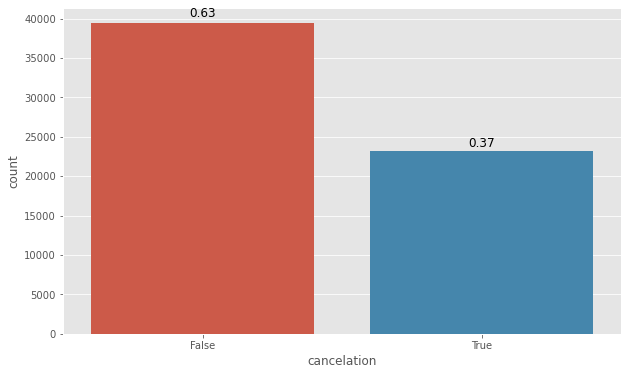

In [6]:
ax = sns.countplot(x="cancelation", data=y_train) ### Show the counts of observations (from y_train data) in each categorical bin (cancelation: True/False) using bars
total = float(y_train.shape[0])
for p in ax.patches: ### Creating the bar plot
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height*1.02,
            '{:1.2f}'.format(height/total),
            size=12,
            ha="center") 
plt.show()

We can see that there are 63% false & 37% true (elaborate)

## Feature Analysis

In [7]:
variable_report = ProfileReport(df=x_train,progress_bar=False,samples=None, correlations=None, missing_diagrams=None, duplicates=None, interactions=None)
# We calculated correlations & missing diagrams by ourselves (below) to show programming abilities & generate good-looking visualizations :)
### Getting information about the data, such as: type, unique values, missing values, quantile statistics, mean, mode, median, standard deviation, sum, skewness, frequent values, histograms, correlation between variables, count etc.

variable_report

### Correlation Matrix

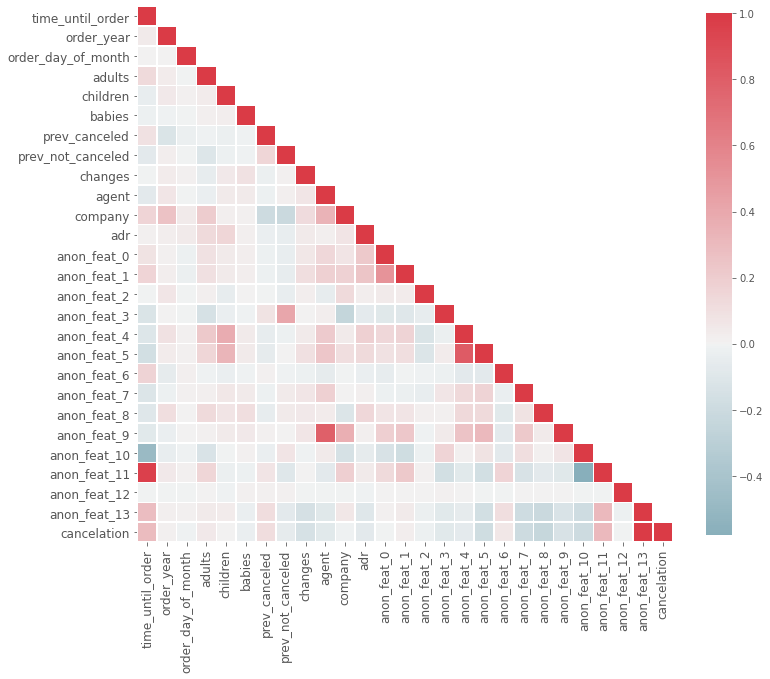

time_until_order  order_year  order_day_of_month  \
time_until_order            1.000000    0.041579            0.003456   
order_year                  0.041579    1.000000            0.001027   
order_day_of_month          0.003456    0.001027            1.000000   
adults                      0.127921    0.036599           -0.000337   
children                   -0.039825    0.051422            0.018326   
babies                     -0.019907   -0.011424           -0.001408   
prev_canceled               0.087939   -0.121086           -0.025344   
prev_not_canceled          -0.073158    0.026172           -0.000670   
changes                    -0.000739    0.033822            0.012258   
agent                      -0.074653    0.063514           -0.001660   
company                     0.157640    0.260262            0.049407   
adr                         0.010041    0.027796            0.043808   
anon_feat_0                 0.084242    0.018904           -0.014405   
anon_feat_1                 0.160603    0.028625           -0.026868   
anon_feat_2                -0.000878    0.067003           -0.003628   
anon_feat_3                -0.122411    0.003679           -0.005444   
anon_feat_4                -0.104598    0.092801            0.016676   
anon_feat_5                -0.172028    0.035793            0.009278   
anon_feat_6                 0.172155   -0.055289            0.020852   
anon_feat_7                -0.115168   -0.016023            0.010936   
anon_feat_8                -0.093805    0.107968            0.003109   
anon_feat_9                -0.084036   -0.033084            0.003343   
anon_feat_10               -0.486090   -0.038662           -0.010587   
anon_feat_11                0.959913    0.053236            0.009998   
anon_feat_12               -0.005417   -0.003462           -0.001342   
anon_feat_13                0.289363    0.022903            0.009006   
cancelation                 0.293911    0.013428           -0.006612   

                      adults  children    babies  prev_canceled  \
time_until_order    0.127921 -0.039825 -0.019907       0.087939   
order_year          0.036599  0.051422 -0.011424      -0.121086   
order_day_of_month -0.000337  0.018326 -0.001408      -0.025344   
adults              1.000000  0.032237  0.021434      -0.007339   
children            0.032237  1.000000  0.028090      -0.025065   
babies              0.021434  0.028090  1.000000      -0.008498   
prev_canceled      -0.007339 -0.025065 -0.008498       1.000000   
prev_not_canceled  -0.109425 -0.020788 -0.007338       0.152204   
changes            -0.052293  0.052578  0.087982      -0.027745   
agent              -0.032729  0.042678  0.047476      -0.012151   
company             0.204265  0.022932  0.010309      -0.194433   
adr                 0.131614  0.154348  0.020613      -0.032960   
anon_feat_0         0.091852  0.046452  0.025296      -0.013804   
anon_feat_1         0.093223  0.044726  0.025942      -0.013077   
anon_feat_2         0.022807 -0.050075  0.002017      -0.003250   
anon_feat_3        -0.146319 -0.032627 -0.008943       0.084116   
anon_feat_4         0.221593  0.377031  0.043802      -0.051216   
anon_feat_5         0.151981  0.328332  0.047190      -0.060831   
anon_feat_6        -0.008481 -0.033964 -0.011476       0.008842   
anon_feat_7         0.023573  0.059683  0.039043      -0.017896   
anon_feat_8         0.134168  0.079610  0.106885      -0.049365   
anon_feat_9         0.012128  0.046686  0.052274       0.009354   
anon_feat_10       -0.124389 -0.002242  0.010735      -0.036095   
anon_feat_11        0.152420 -0.030209 -0.019728       0.080087   
anon_feat_12        0.003672 -0.005951  0.008513       0.009831   
anon_feat_13        0.049238  0.035715 -0.031906       0.113219   
cancelation         0.054725  0.001383 -0.033900       0.111702   

                    prev_not_canceled   changes     agent  ...  anon_feat_5  \
time_until_order            -0.073158 -0.000739

In [8]:
def plot_correlation_matrix(data, numeric_features):
    
    cor_mat = data[numeric_features].corr()
    corr_left_triangle = cor_mat.where(np.tril(np.ones(cor_mat.shape)).astype(np.bool))
    # Generate a mask for the upper triangle
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 12))
    # Generate a custom diverging colormap
    ax.set_facecolor('xkcd:white')
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    sns.heatmap(corr_left_triangle, cmap=cmap, vmax=1, center=0,  # vmax=max_correlation
                square=True, linewidths=.5, cbar_kws={"shrink": 0.8})
    plt.show()
    
plot_correlation_matrix(train_with_label,train_with_label.columns)
train_with_label.corr()

We can see that there is a high Correlation between the features "anon_feat_11" and "time of order", and also between the features "anon_feat_8" and "agent" - by the red (hot) color in the matrix.
On the other hand, we can see low correlation between the features "anon_feat_10" and "time_until_order" & "anon_feat_11" (by the blue (cold) color in the matrix). These results make sense - "anon_feat_11" & "time_until_order" are pretty similar (due to the fact that they have a high correlation score), and we would expect that features that have low Correlation with one of them, will also have low correlation with the other.

Moreover, anon_feat_13 is perfectly correlated with the label, which is very suspicious and could be due to data leakage. We decided to keep this feature as it is anonymized (and improves our predictions) but a deeper examination is due to understand its source.

Note that in order to look at the exact number (of corr), we need to write: "train_with_label.corr()"
Also, we need to elaborate (of course)

### Box plots

--------------------------------------------------


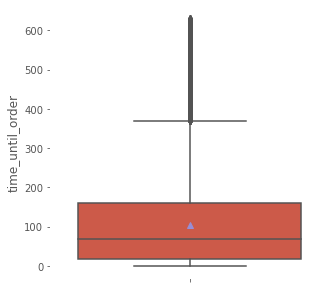

--------------------------------------------------


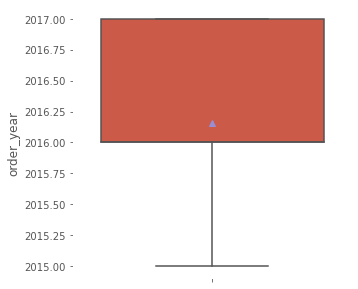

--------------------------------------------------


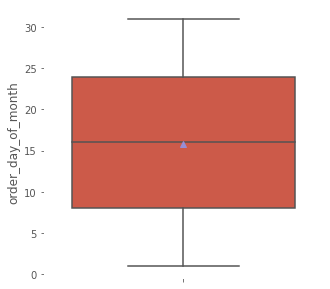

--------------------------------------------------


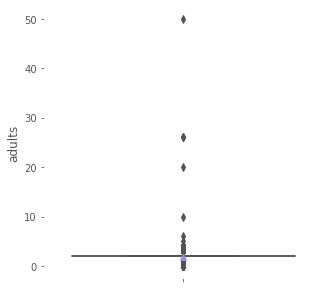

--------------------------------------------------


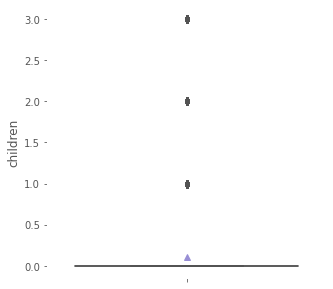

--------------------------------------------------


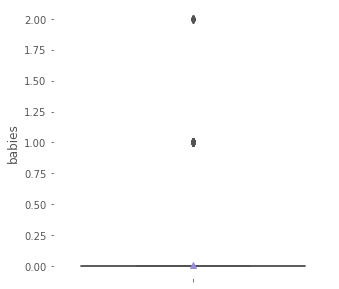

--------------------------------------------------


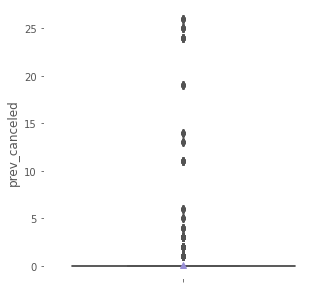

--------------------------------------------------


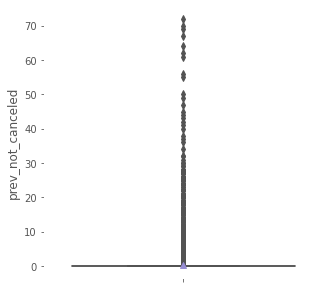

--------------------------------------------------


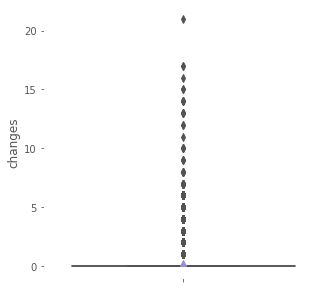

--------------------------------------------------


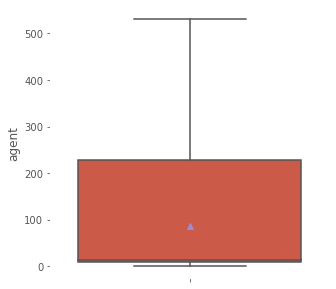

--------------------------------------------------


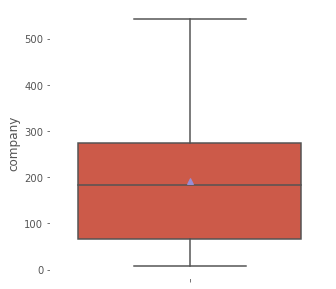

--------------------------------------------------


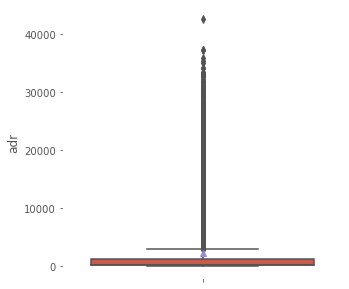

--------------------------------------------------


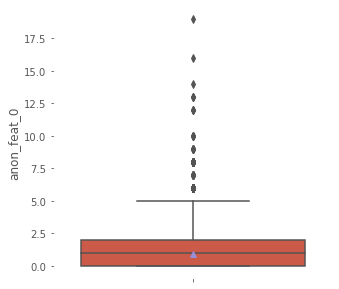

--------------------------------------------------


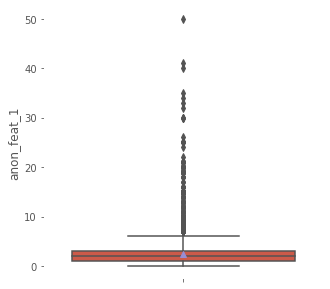

--------------------------------------------------


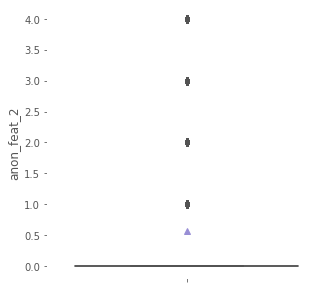

--------------------------------------------------


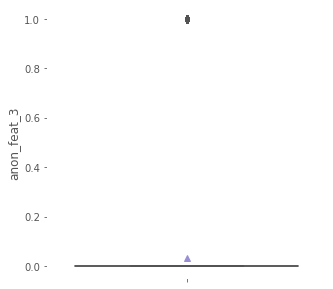

--------------------------------------------------


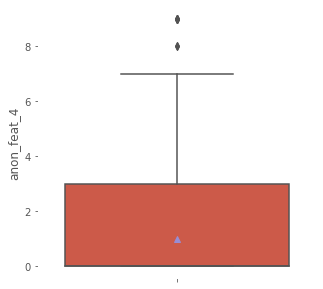

--------------------------------------------------


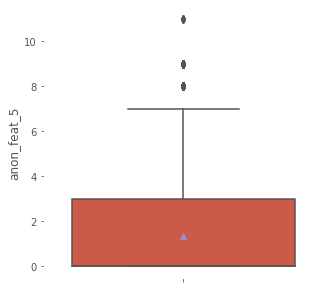

--------------------------------------------------


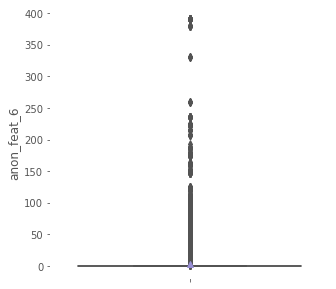

--------------------------------------------------


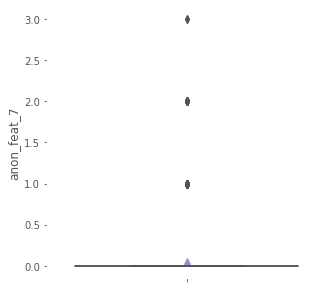

--------------------------------------------------


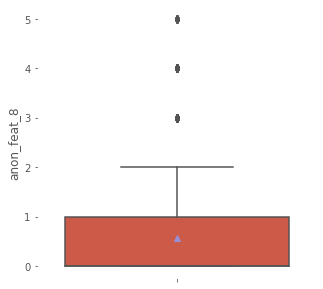

--------------------------------------------------


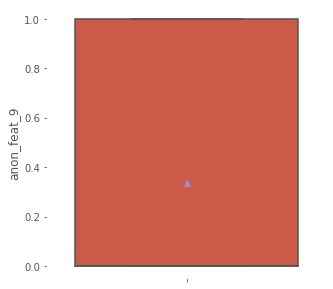

--------------------------------------------------


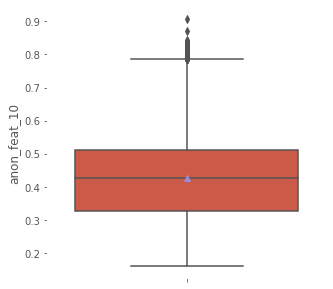

--------------------------------------------------


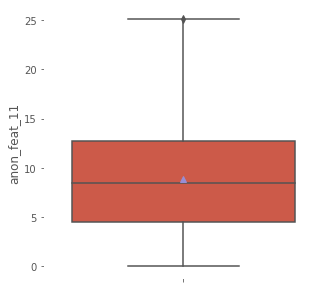

--------------------------------------------------


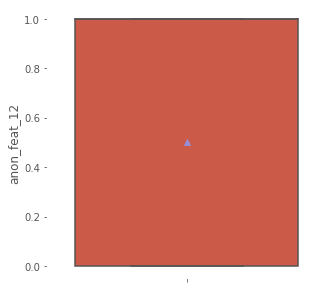

--------------------------------------------------


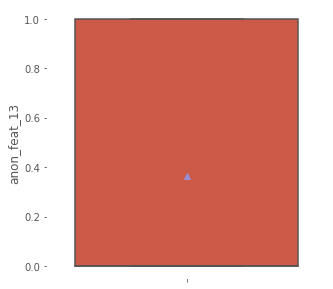

In [9]:
numeric_features = x_train.select_dtypes(exclude = 'object').columns
cat_features = x_train.select_dtypes(include = 'object').columns

for feature in numeric_features:
    print('--------------------------------------------------')
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_facecolor('xkcd:white')
    sns.boxplot(y=feature, data=x_train, showmeans=True)
    plt.show()

Some of the box plots may indicate on the feature distribution. The feature distribution helps in understanding what kind of feature we are dealing with, and what values we can expect this feature to have.
For example - looking at the "order day of month" box plot, we understand that the feature variables are normally distributed, with median score of 15, Q1 of 8, Q2 of 24, min of 1 & max of 31. The shape of the box plot (with the scores that er mentioned above), represent a normal distribution. Looking at the "time_until_order" feature, we get right tail distribution, where most of the observations are on the bottom (left) side of the graph. 

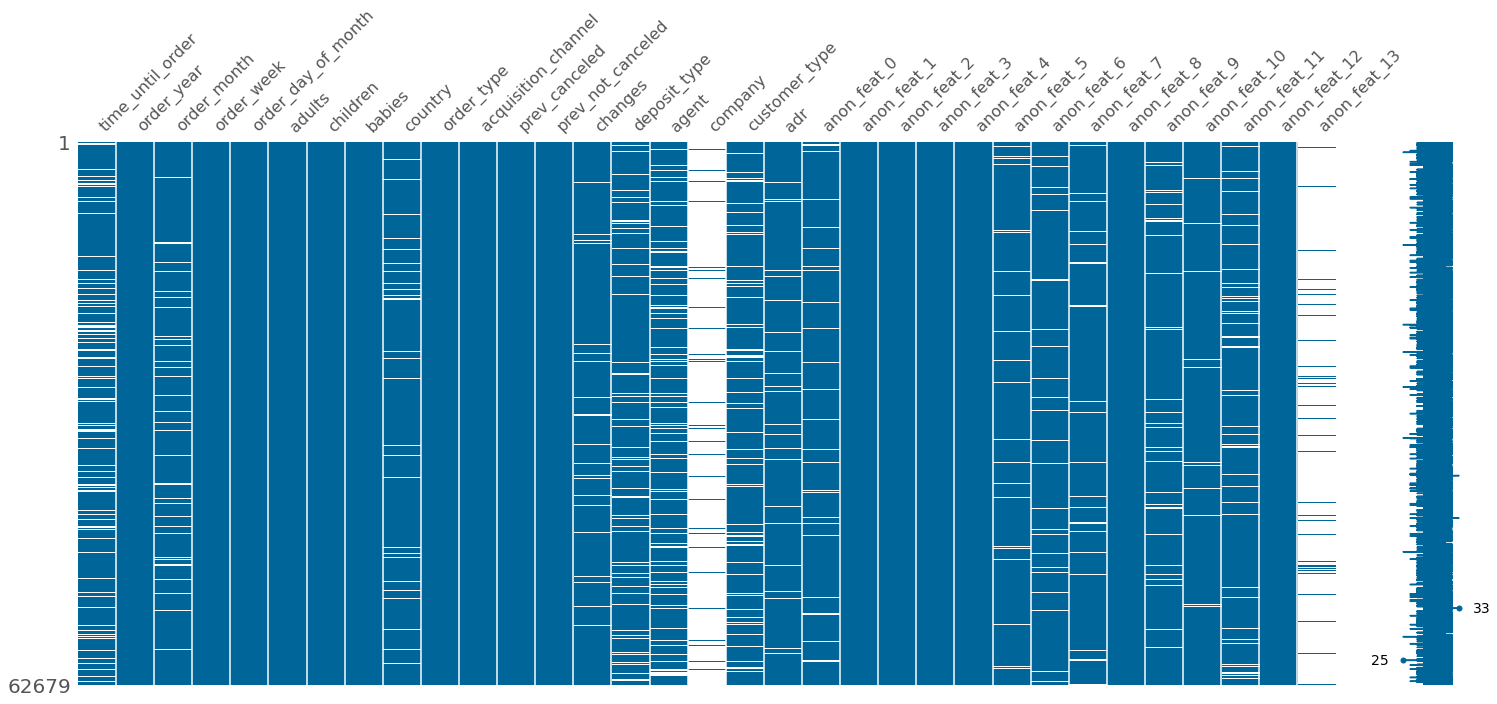

In [10]:
missing_color = (0, 0.4, 0.6)
msno.matrix(x_train,color=missing_color);

<AxesSubplot:>

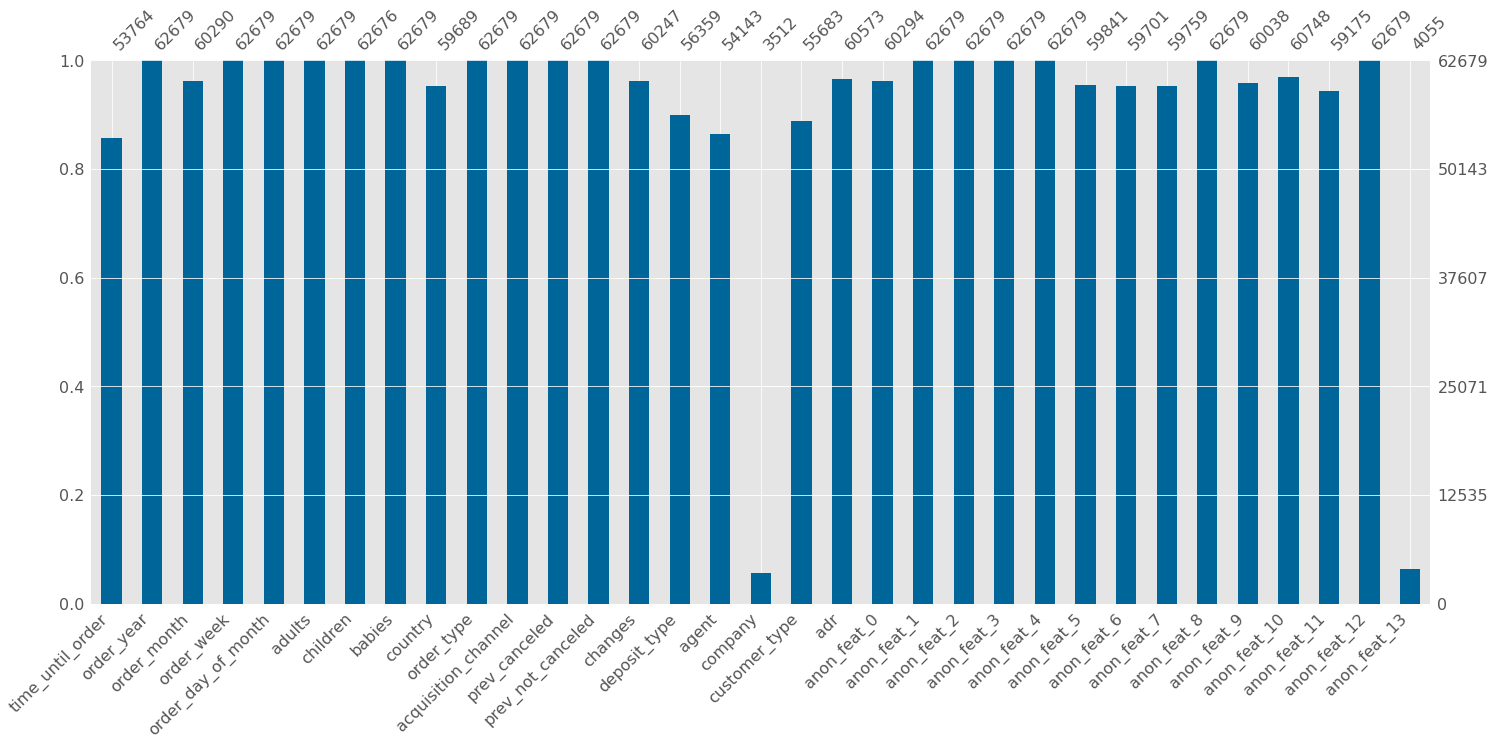

In [11]:
msno.bar(x_train,color=missing_color)

****************************
time_until_order
****************************


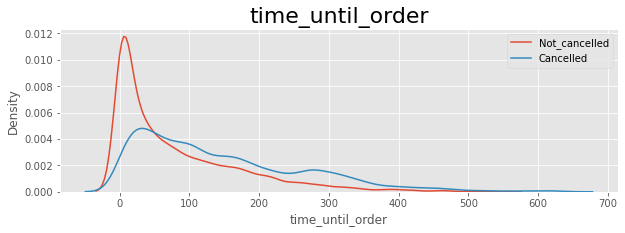

****************************
order_year
****************************


<Figure size 720x216 with 0 Axes>

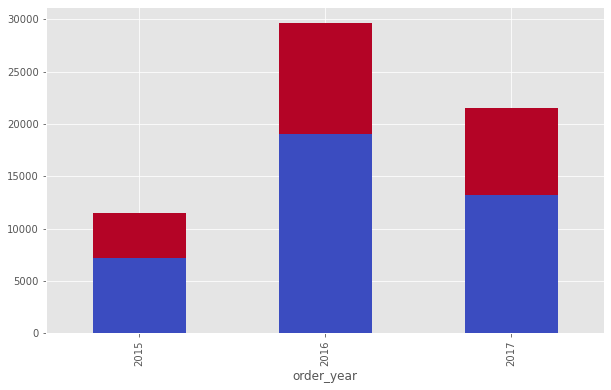

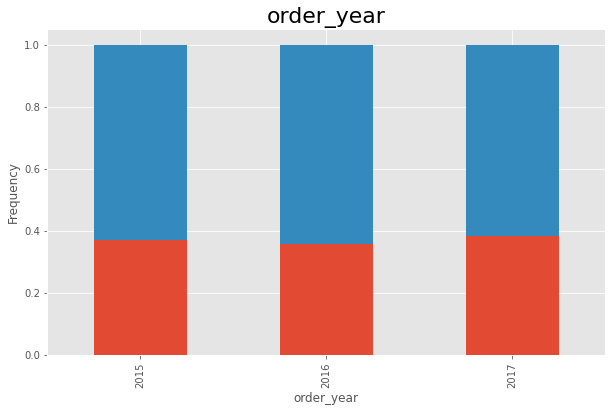

****************************
order_month
****************************


<Figure size 720x216 with 0 Axes>

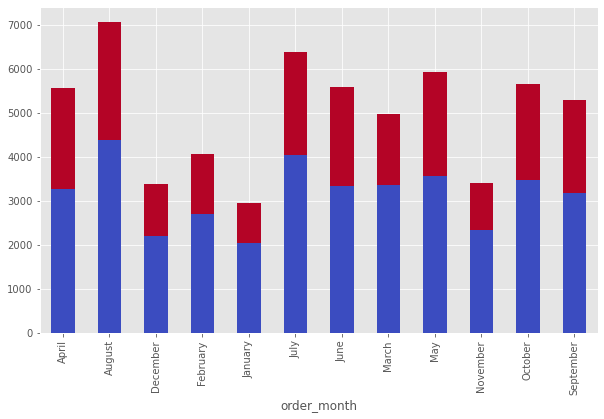

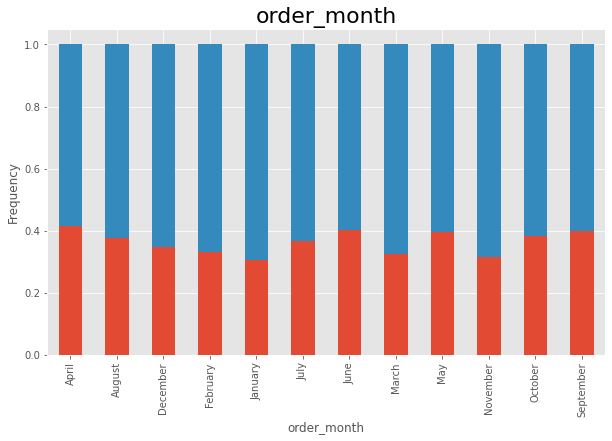

****************************
order_week
****************************


<Figure size 720x216 with 0 Axes>

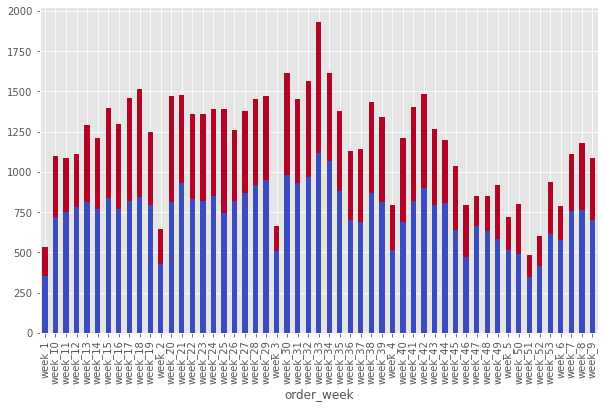

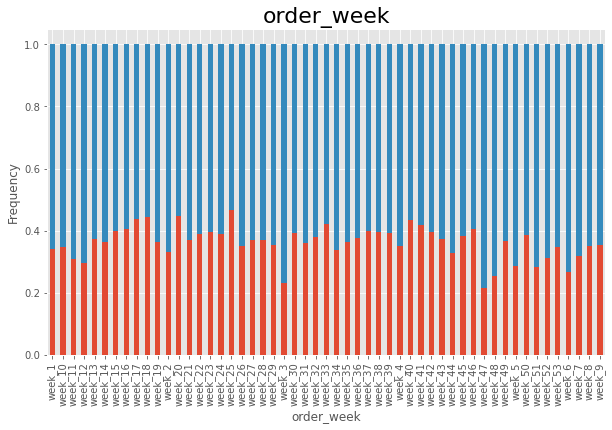

****************************
order_day_of_month
****************************


<Figure size 720x216 with 0 Axes>

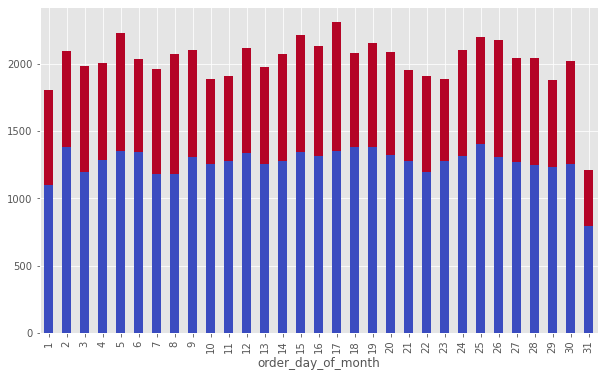

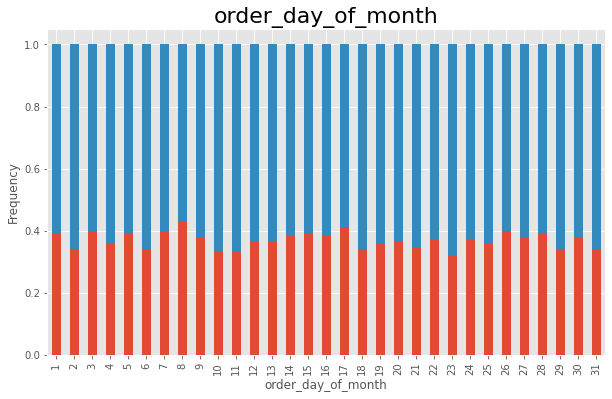

****************************
adults
****************************


<Figure size 720x216 with 0 Axes>

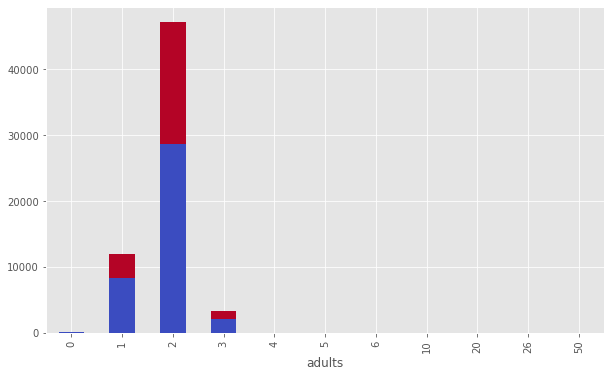

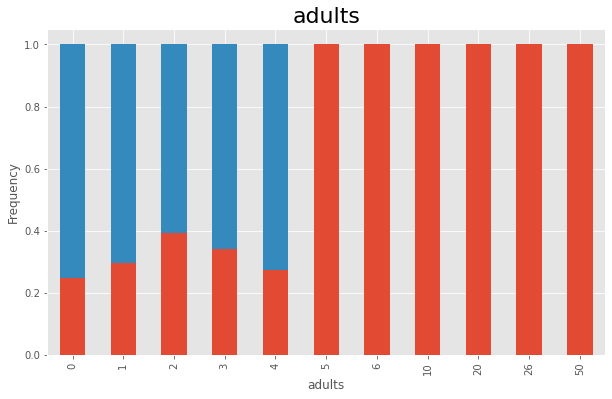

****************************
children
****************************


<Figure size 720x216 with 0 Axes>

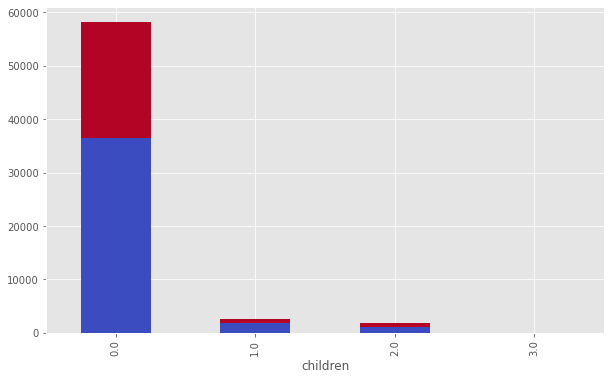

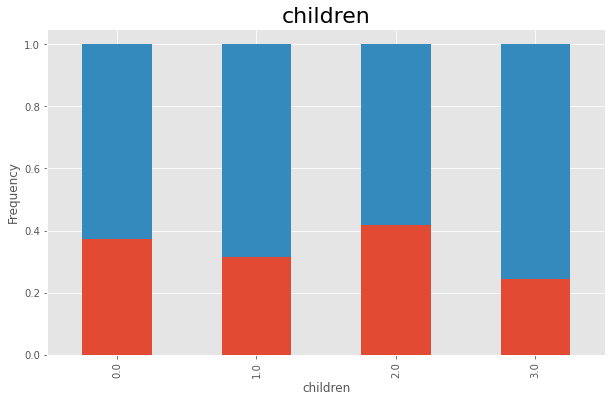

****************************
babies
****************************


<Figure size 720x216 with 0 Axes>

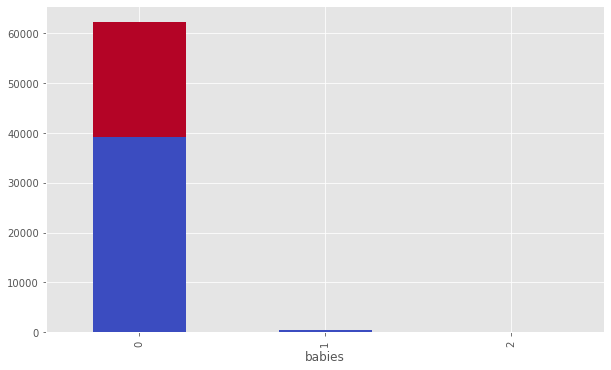

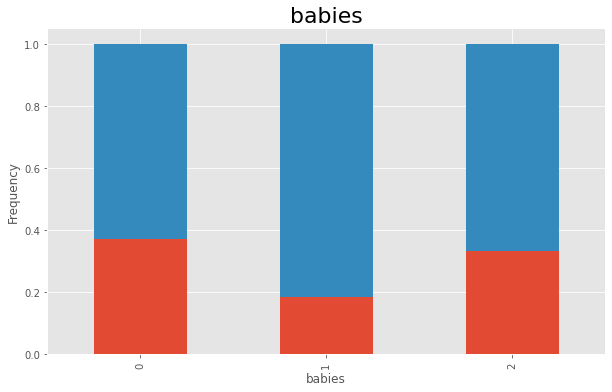

****************************
order_type
****************************


<Figure size 720x216 with 0 Axes>

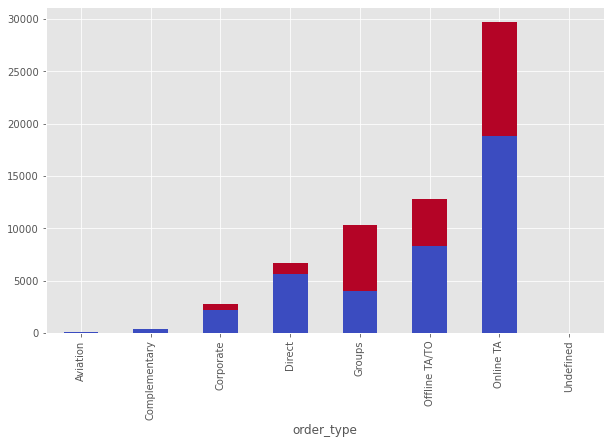

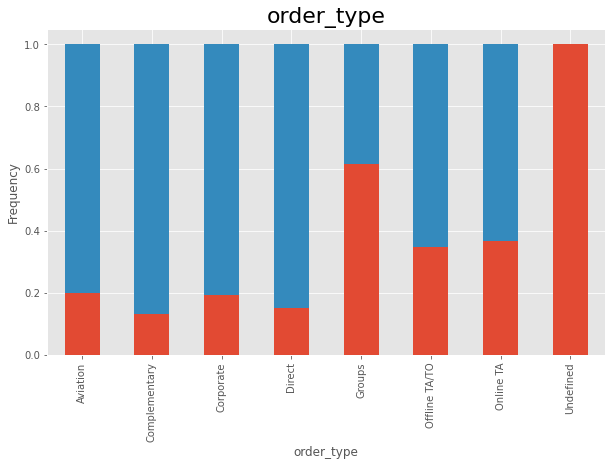

****************************
acquisition_channel
****************************


<Figure size 720x216 with 0 Axes>

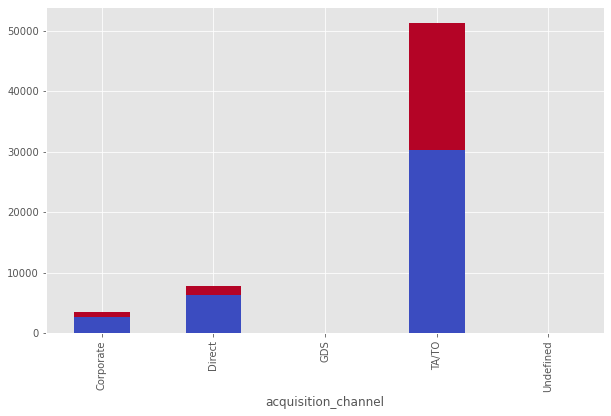

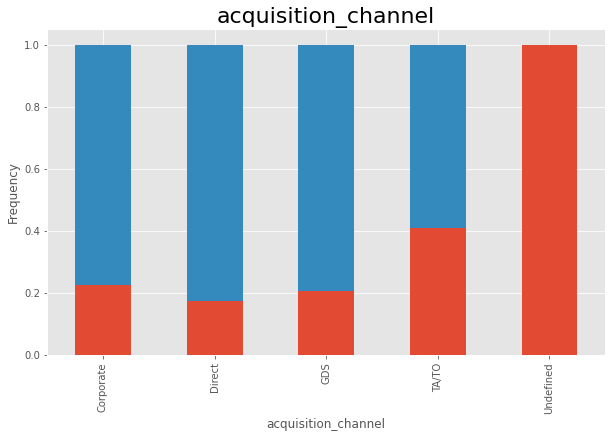

****************************
prev_canceled
****************************


<Figure size 720x216 with 0 Axes>

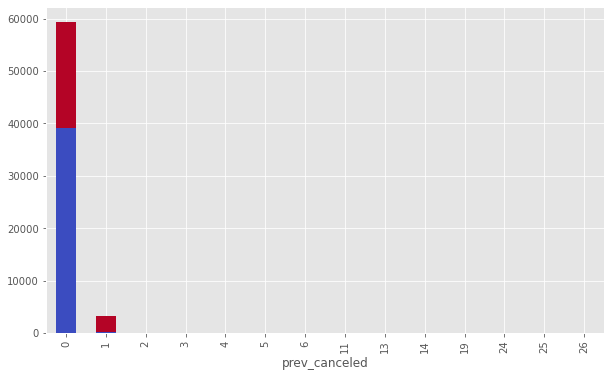

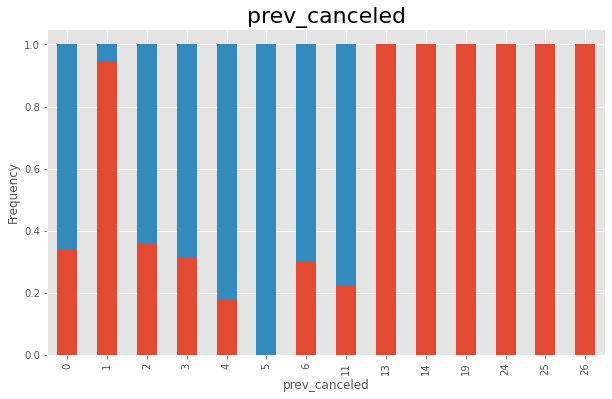

****************************
prev_not_canceled
****************************


<Figure size 720x216 with 0 Axes>

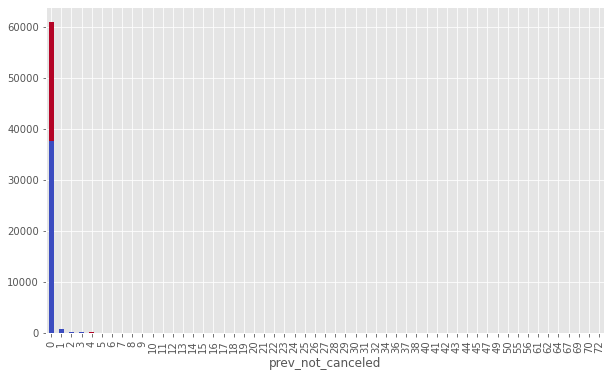

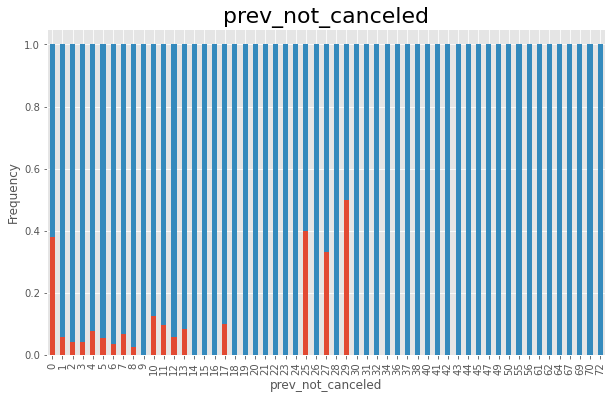

****************************
changes
****************************


<Figure size 720x216 with 0 Axes>

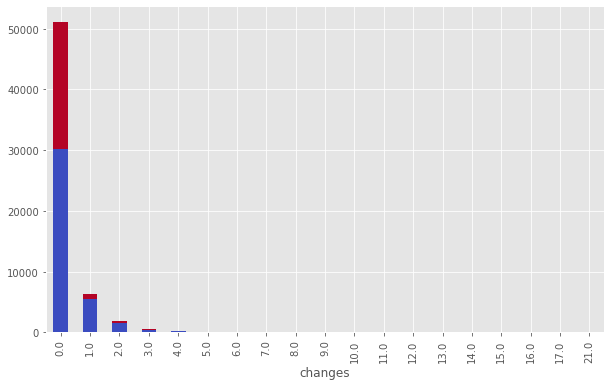

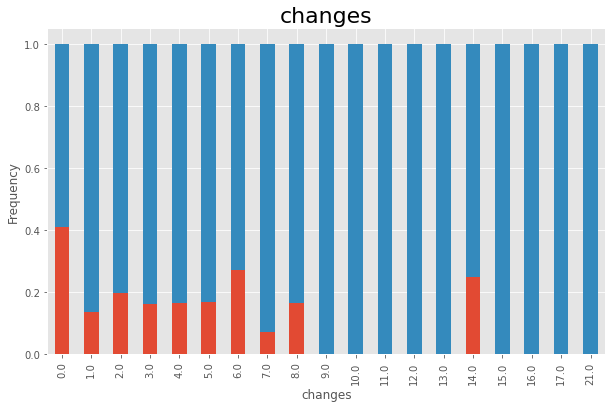

****************************
deposit_type
****************************


<Figure size 720x216 with 0 Axes>

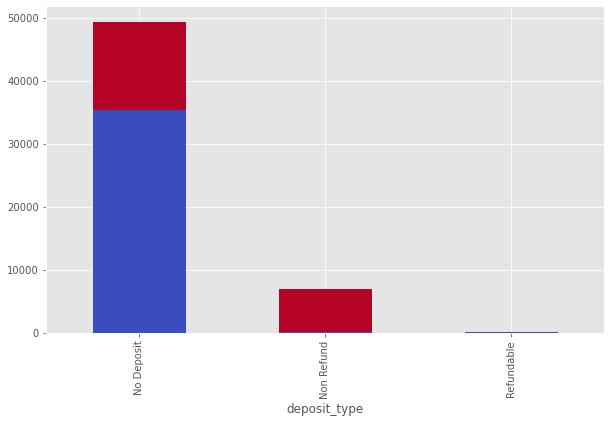

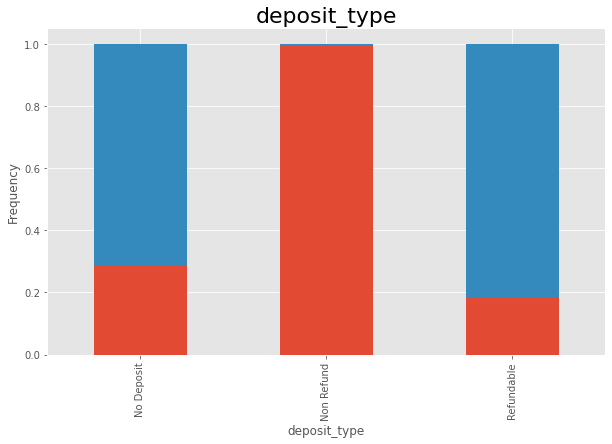

****************************
agent
****************************


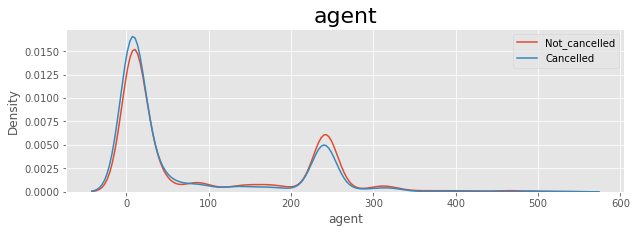

****************************
company
****************************


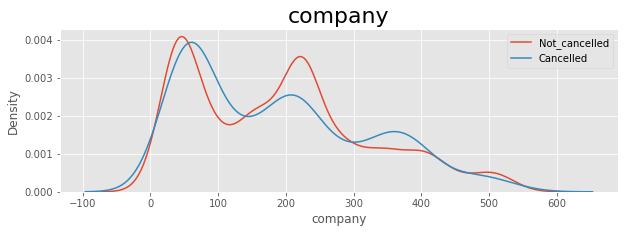

****************************
customer_type
****************************


<Figure size 720x216 with 0 Axes>

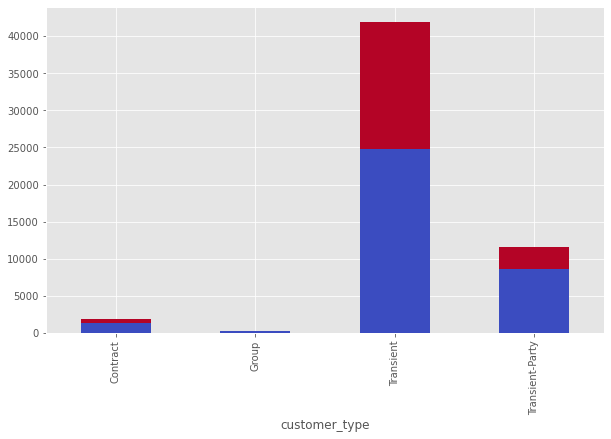

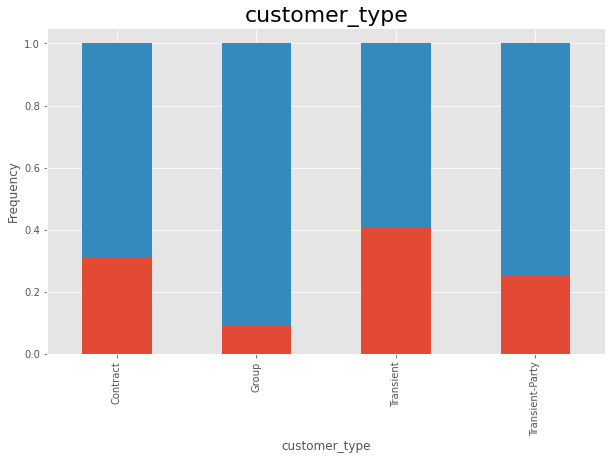

****************************
adr
****************************


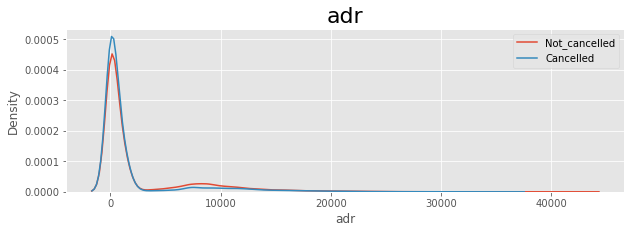

****************************
anon_feat_0
****************************


<Figure size 720x216 with 0 Axes>

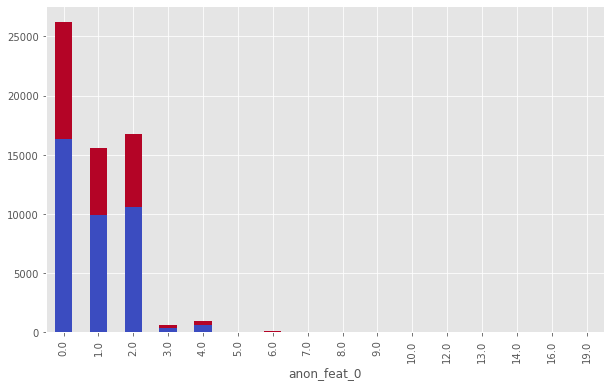

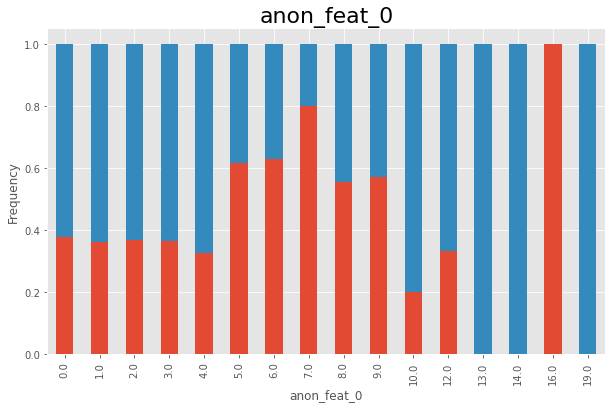

****************************
anon_feat_1
****************************


<Figure size 720x216 with 0 Axes>

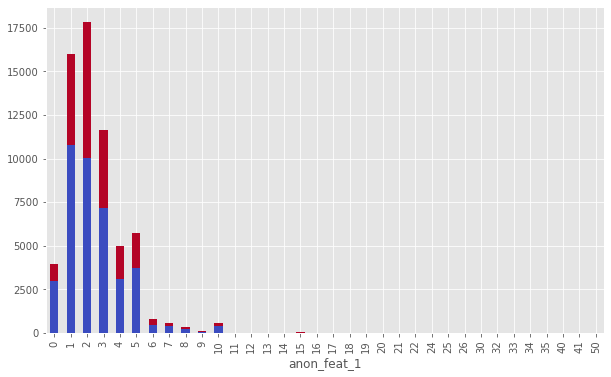

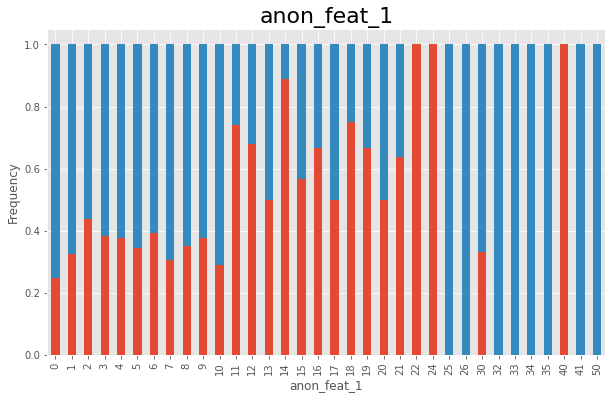

****************************
anon_feat_2
****************************


<Figure size 720x216 with 0 Axes>

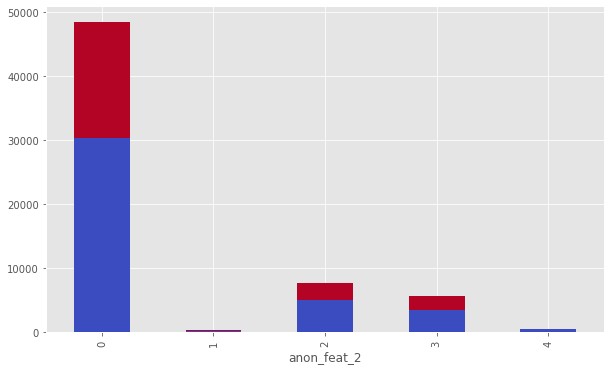

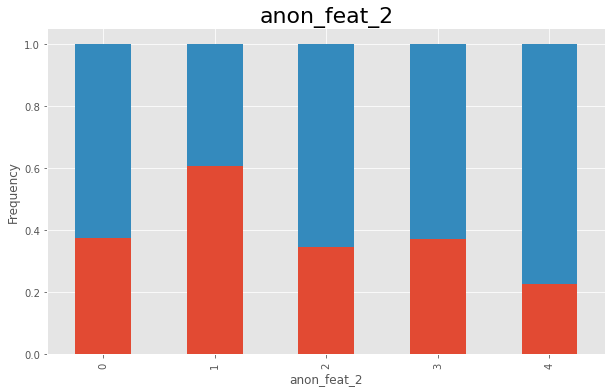

****************************
anon_feat_3
****************************


<Figure size 720x216 with 0 Axes>

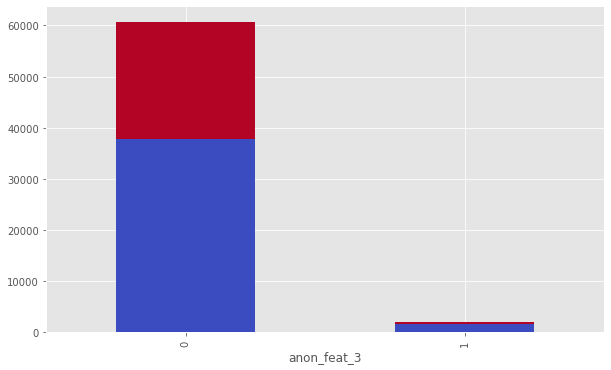

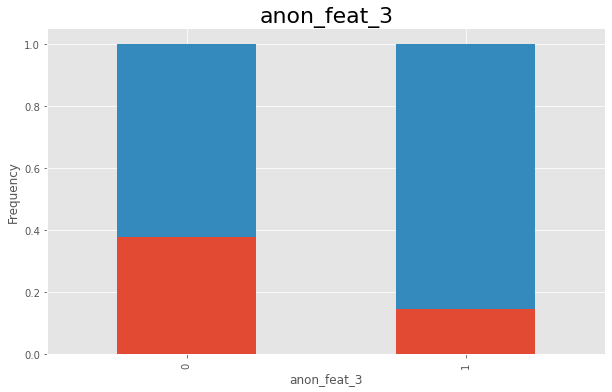

****************************
anon_feat_4
****************************


<Figure size 720x216 with 0 Axes>

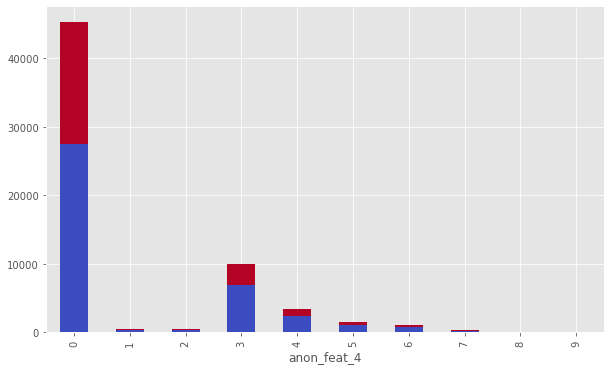

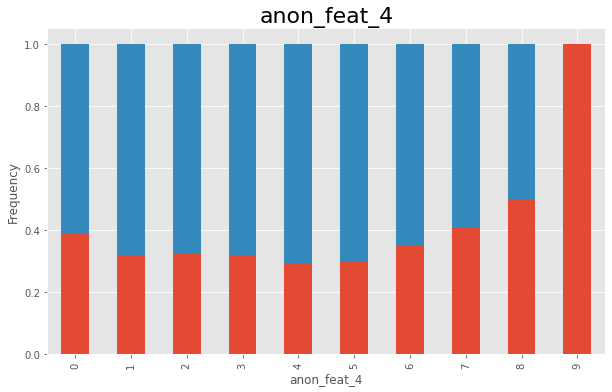

****************************
anon_feat_5
****************************


<Figure size 720x216 with 0 Axes>

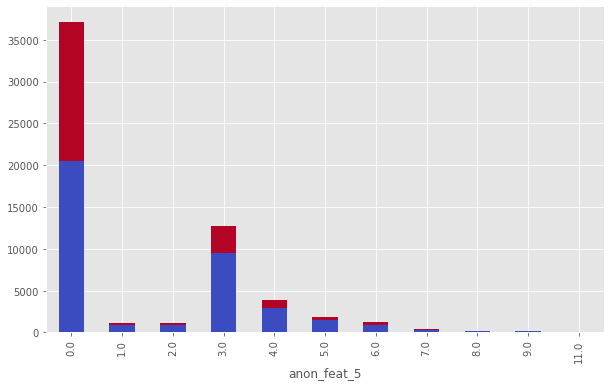

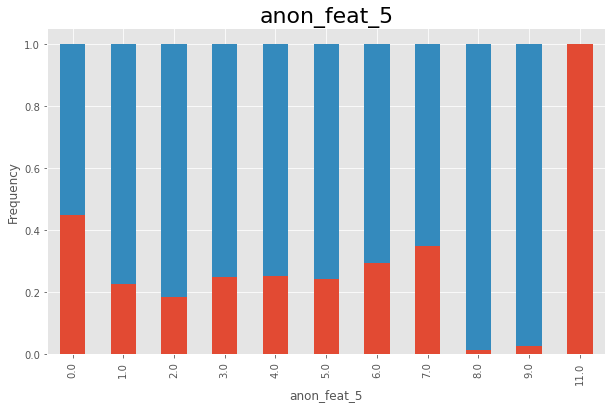

****************************
anon_feat_6
****************************


<Figure size 720x216 with 0 Axes>

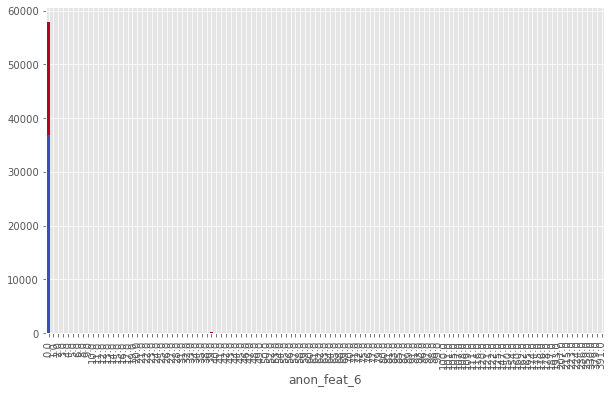

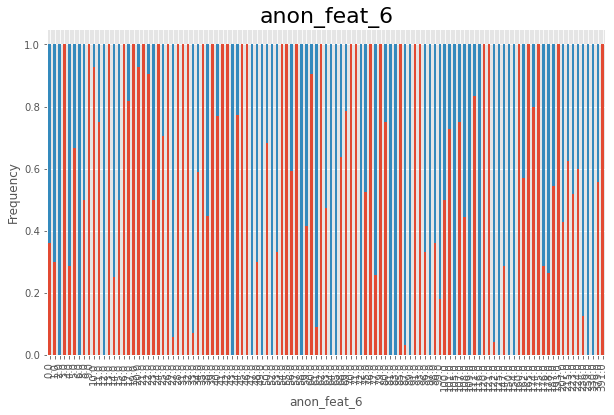

****************************
anon_feat_7
****************************


<Figure size 720x216 with 0 Axes>

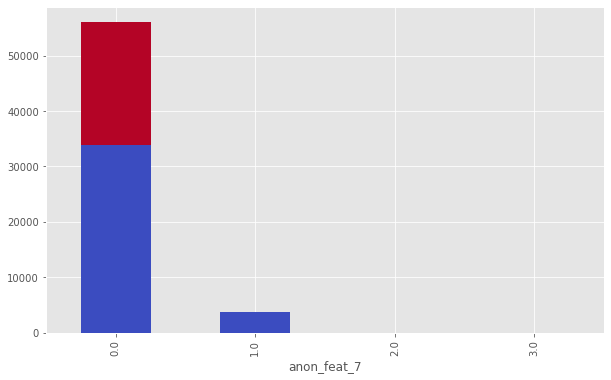

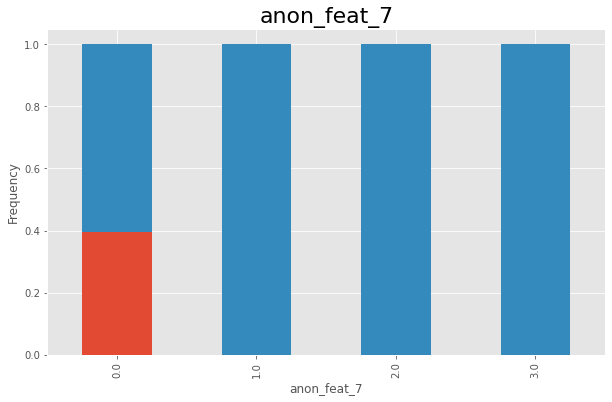

****************************
anon_feat_8
****************************


<Figure size 720x216 with 0 Axes>

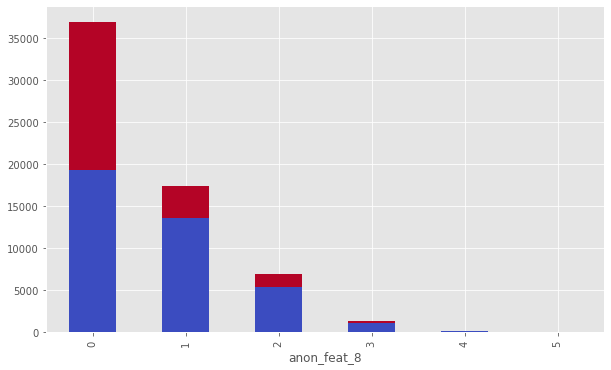

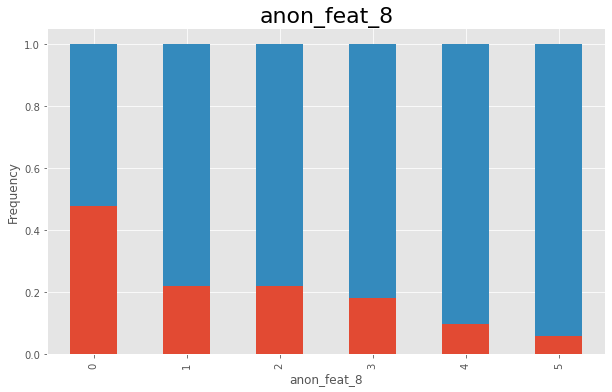

****************************
anon_feat_9
****************************


<Figure size 720x216 with 0 Axes>

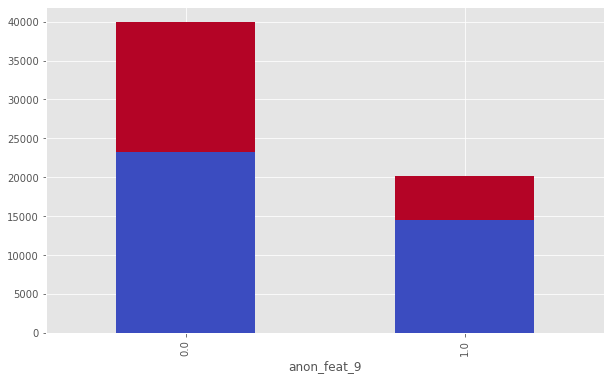

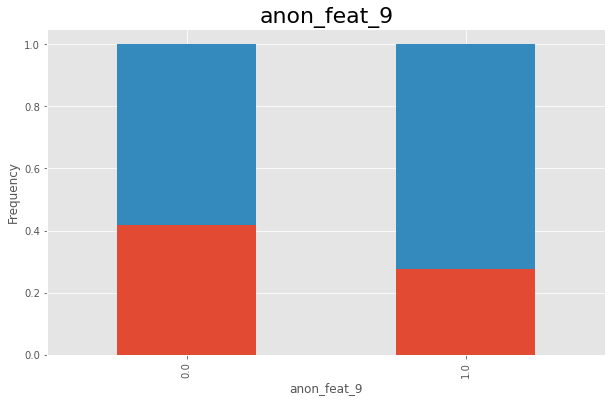

****************************
anon_feat_10
****************************


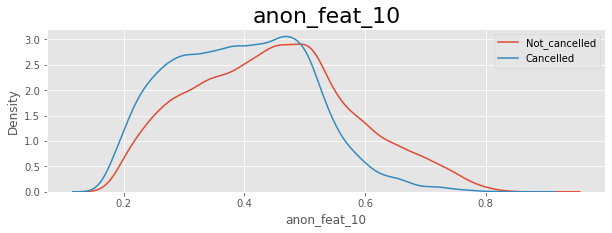

****************************
anon_feat_11
****************************


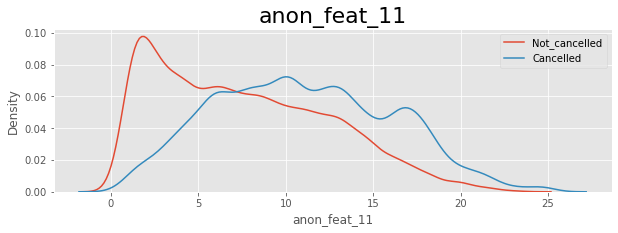

****************************
anon_feat_12
****************************


<Figure size 720x216 with 0 Axes>

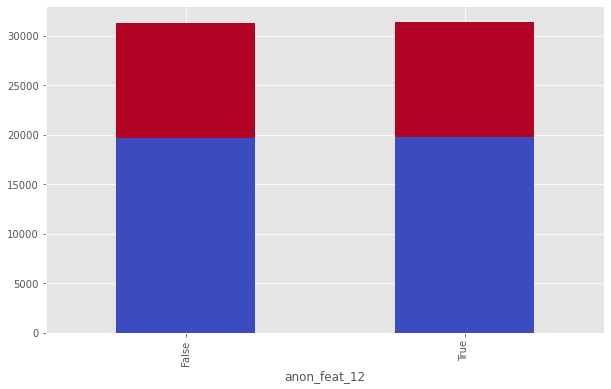

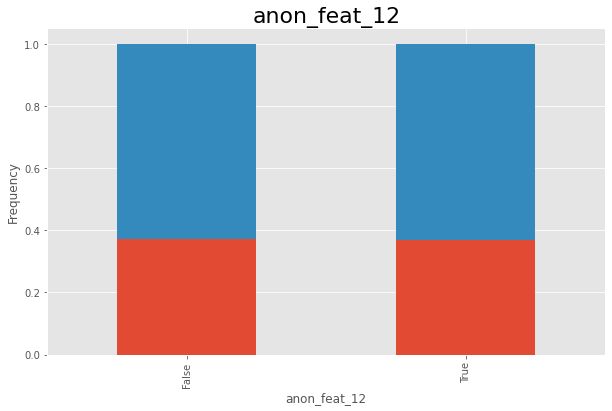

****************************
anon_feat_13
****************************


<Figure size 720x216 with 0 Axes>

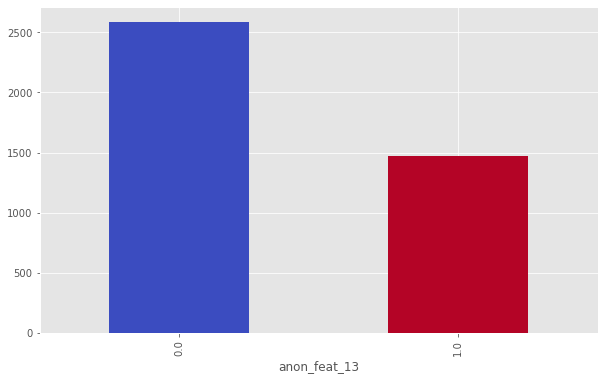

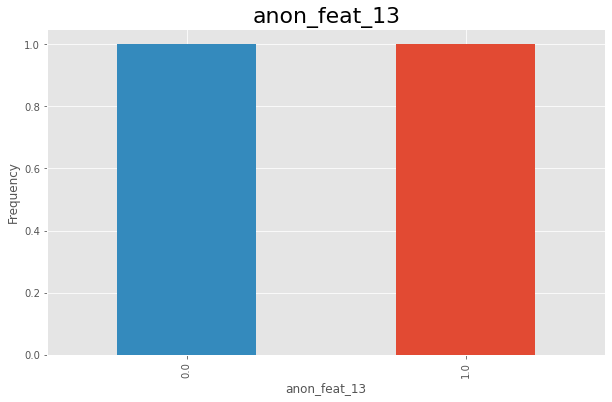

In [12]:
# KDE plots for continuous variables, histograms for discrete

features_to_plot = x_train.loc[:,x_train.columns != 'country'].columns

# Density Plot w.r.t label
def density_plots(df, features):
    '''
    For each feature in features: returns a histogram/density plot (if discrete/continuous, respectively) given the data in df
    Parameters
    ----------
    None
    Returns
    ----------
    Plots
        histogram/density plots for each feature in features
    '''
    for col in features:
        print ('****************************')
        print (col)
        print ('****************************')
        plt.figure(figsize=(10, 3))
        # continuous features
        if col in ('time_until_order','agent','company','adr','anon_feat_10','anon_feat_11'):
            sns.kdeplot(df.loc[df.cancelation == False, col], label='Not_cancelled')
            sns.kdeplot(df.loc[df.cancelation == True, col], label='Cancelled')
            plt.title(col, fontsize=22)
            plt.legend()
            plt.show()
        else:
            no_nans_df = df[[col, 'cancelation']].dropna()
            plot_hist(no_nans_df, col)
            plt.show()

def plot_hist(df, feature):
    '''
    Plots a histogram for the input feature given the data in df
    Parameters
    ----------
    None
    Returns
    ----------
    Histogram
        Histogram on feature
    '''    
    colors = [plt.cm.coolwarm_r(float(i)) for i in range(1,-1,-1)]
    x = df.pivot_table(index=feature, columns='cancelation', aggfunc='size')
    x.plot(kind='bar',stacked=True,color=colors,legend=False)
    
    x_copy = x.copy()
    x_copy['sum'] = x_copy.sum(axis=1)
    x_copy['False_%'] = x_copy.iloc[:,0]/x_copy['sum']
    x_copy['True_%'] = x_copy.iloc[:,1]/x_copy['sum']
    x_copy.loc[:,["True_%","False_%"]].plot(kind='bar',stacked=True,legend=False)
    
    # Decoration
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(feature, fontsize=22)
    plt.show()
density_plots(train_with_label, features_to_plot);

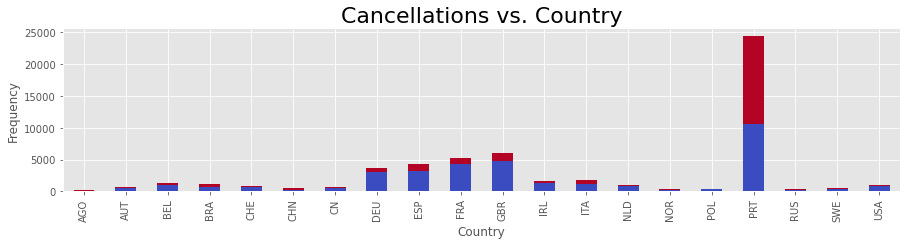

In [13]:
# Plot cancellations per country. For readability, we will take the top 20 countries in terms of cancellations.

countries_with_most_cancelations = train_with_label[train_with_label.cancelation==True].groupby(['country']).size().nlargest(20).index
plot_country_cancelations = train_with_label[train_with_label.country.isin(countries_with_most_cancelations)]

colors = [plt.cm.coolwarm_r(float(i)) for i in range(1,-1,-1)]
plot_country_cancelations.pivot_table(index='country', columns='cancelation', aggfunc='size').plot(kind='bar',stacked=True,color=colors,legend=False,figsize=(15,3))


# Decoration
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.title('Cancellations vs. Country', fontsize=22)
plt.show()

Insights:
1. It looks as if time_until_order & anon_feat_11 could be useful for prediction as the distributions between the True/False labels are different. However, those two features are highly correlated so the added benefit of one feature over another may be low.
2. Anon_feat_1 does also have different values between good & bad - could also be useful.
3. Other potential features - prev_canceled, acquisition_channel, anon_feats 7 & 8.
4. Deposit - it looks as non-refundable reservations are scarcely canceled. On the other hand - refundable reservations or ones with no deposit have a much higher chance of becoming cancelled (which makes sense).
5. It appears that some of the reservations do not have information about the month (3.8% in the Train data). However, all of the records have the Work week and Year. Meaning, if the month data is missing, we could complete it using those two features (will be implemented in the DateTransformer below).
6. We will impute other missing values using medians (for example for the time_until_order, anon features) as it is less affected by extreme values, compared to the mean.
7. It seems that most of the cancellations are in Portugal - we will use OHE on the country column so we could have a specific column per country. Other interesting countries - Great Britain (GBR), France (FRA), Spain (ESP), Germany (DEU)

# Feature Engineering

<font color='royalblue'>**A(2.6) + A(2.8)**</font>

### Define Transformers - 
We packed the Feature Engineering stage into two custom transformers (created using sklearn's TransformerMixin class)):

1. DateTransformer - 
   - Fixing the month number - 3.8% of the train records do not have information on their month. We fixed this issue by inferring the month from the Work week & year.
   
   - Creating 7 new date features
       - Month number
       - Week number - Extracting the number from the given data, e.g. "week_7"
       - Date - Inferring the full date using the day, month & year. If month is not available -> we first inferred the month and then the full date.
       - Unix Time - a continuous variable describing each point in time. It is the number of seconds that have elapsed since the January 1st 1970. Hence, two adjacent dates will have adjacent Unix times.
       - Sin & Cos of Month - as months are cyclical in nature, i.e. December (12) and January (1) are close to each other, transformed each month into two dimensions using a sine and cosine transformation. Thus, the distance between Dec & Jan is similar to the distance between Jan & Feb. ([Link_1 to example article](https://www.kaggle.com/avanwyk/encoding-cyclical-features-for-deep-learning)), ([Link_2 to example article](https://towardsdatascience.com/cyclical-features-encoding-its-about-time-ce23581845ca))
       - Sin & Cos of Week - Similarly to months, weeks are also cyclical in nature. Thus, we performed a similar transformation using sine & cosine
       - Sin & Cos of Day - Similar as above.
   
  
2. FeatureTransformer - The input of this transformer is a DataFrame with the new date features (after the data transformer), and it outputs a ready-to-use DataFrame for all of our models. This transformer imputes missing values, creates new features (such as number_of_guests which is the sum of adults, children and babies) and transforms categorical columns into one-hot-encodings (OHE). It consists of 5 mini-transformers:
   - time_until_order_transformer - relevant for column: 'time_until_order'
        - Imputes missing values by using the median value of this column in the training set
   - deposit_OHE - relevant for column: 'deposit_type'
        - Imputes missing values as 'No deposit'. The mode in this feature is “No Deposit” and therefore we presume that if there were values missing in this column, it means no deposit was taken (otherwise it would have been stated).    
   - country_OHE - relevant for column: 'country'
        - Imputes missing values as 'unknown'
        - Splits this feature into dummy variables, which take the value of 1/0 to indicate the presence or absence of each country per country-dummy variable.
   - anon_Transformer - relevant for all the anon columns
        - Imputes missing values by using the median values of each column in the training set
   - num_cat_Transformer - relevant for all other numeric & category columns
        - Imputes missing values for columns: 'adults','children','babies','adr' with 0 (assuming if data is missing then it is because the value is 0).
        - Creates new feature - num_of_guests: the sum of adults,children & babies
        - Imputes missing values of the remaining category columns as 'unknown'. Thus, after OHE, all records with missing values will have a value of 1 in the 'unknown' variable in each feature.
        - In each categorical feature, we created new dummy features only for values that appeared at in at least 0.001 of the records (using the parameter min_df).


In [14]:
from sklearn.base import TransformerMixin, BaseEstimator
import datetime
import time

class DateTransformer(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        '''
        Returns the input DataFrame without changes
        Parameters
        ----------
        None
        Returns
        ----------
        DataFrame
            The input DataFrame 
        '''
        return self
    
    def transform(self,X):
        '''
        Creates new dates features - 1) month number, 2) date, 3) Unix Time, 4) Sin & Cos of month, 5) Sin & Cos of Week
        Parameters
        ----------
        None
        Returns
        ----------
        DataFrame
            The input DataFrame with additional columns
        '''
        X_copy = X.copy()
        X_copy['order_month_num'] = X_copy.apply(lambda row: self.month_name_to_number(row),axis=1)
        X_copy['order_week_num'] = X_copy.apply(lambda row: int(row.order_week.split('_')[-1]),axis=1)
        X_copy['order_date'] = X_copy.apply(lambda row:  self.get_date(row),axis=1)
        X_copy['order_date_unix'] = X_copy['order_date'].apply(lambda x: time.mktime(x.timetuple()))

        # Fix the month number, get it from the order_date
        X_copy['order_month_num'] = pd.DatetimeIndex(X_copy['order_date']).month
        
        # Encode month, week, day as cyclical features using sin, cosine transformations
        X_copy['order_month_sin'] = np.sin(2 * np.pi * X_copy['order_month_num']/12)
        X_copy['order_month_cos'] = np.cos(2 * np.pi * X_copy['order_month_num']/12)
        X_copy['order_week_sin'] = np.sin(2 * np.pi * X_copy['order_week_num']/52)
        X_copy['order_week_cos'] = np.cos(2 * np.pi * X_copy['order_week_num']/52)
        
        X_copy['num_days_in_month'] = X_copy.order_date.dt.daysinmonth # Used only to calculate sin,cos of day_of_month
        X_copy['order_day_sin'] = np.sin(2 * np.pi * X_copy['order_day_of_month']/X_copy['num_days_in_month'])
        X_copy['order_day_cos'] = np.cos(2 * np.pi * X_copy['order_day_of_month']/X_copy['num_days_in_month'])

        return X_copy
    
    def get_date(self,row):
        '''
        Extracts the date from each record's day,month,year. If month is not available, infer first the month from the workweek and then calculate the date
        Parameters
        ----------
        None
        Returns
        ----------
        DateTime 
            the calculated date
        '''
        day = row.order_day_of_month
        month = row.order_month_num
        year = row.order_year
        if pd.notnull(day) and 1<=month<=12 and pd.notnull(year):
            return  datetime.datetime(year, month, day)
        elif month==99: # If month = 99 (no month name), then extract the date from the week number
            week = row.order_week
            week_num = week.split('_')[-1]
            d = str(year)+'-W'+str(week_num)  
            inferred_date = datetime.datetime.strptime(d + '-1', "%Y-W%W-%w") # Return the date of the Monday in the week (Monday assuming it's the first day of the week)
            try: # Trying to conclude the real month from the week_num. However, in a very small amount of cases where the week_num 
                return datetime.datetime(year, inferred_date.month(), day)
            except:
                return inferred_date
        
    def month_name_to_number(self,row):
        '''
        Takes a month name and returns a month number
        Parameters
        ----------
        None
        Returns
        ----------
        int
            the month number
        '''
        long_month_name = row['order_month']

        # if month_name is null -> return 99
        if pd.isnull(long_month_name):
            return 99
        datetime_object = datetime.datetime.strptime(long_month_name, "%B")
        return int(datetime_object.month)   
    

In [15]:
from sklearn.base import TransformerMixin, BaseEstimator
from scipy.sparse import csr_matrix
from scipy.sparse import hstack as sparse_hstack
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion

def add_prefix(lst,prefix):
    '''
    adds prefix before each element in list (will be used in the feature names)
    Parameters
    ----------
    lst, List
    prefix, String
    Returns
    ----------
    List
        list of prefix_x for each x element in list
    '''
    return [prefix+"__"+x for x in lst]

class FeatureTransformer(TransformerMixin):
    def __init__(self,  is_time_until_order_transformer=True, is_num_cat_Transformer=True, is_deposit_OHE=True,
                 is_country_OHE=True,
                 is_anon_Transformer=True
                ):
        '''
        Consists of 5 transformers: 1) time_until_order_transformer, 2) num_cat_Transformer, 3) deposit_OHE, 4) country_OHE, 5) anon_Transformer
        
        Parameters
        ----------
        1) is_time_until_order_transformer - True if we want to enable the time_until_order_transformer, Otherwise False
        2) is_num_cat_Transformer - True if we want to enable the num_cat_Transformer, Otherwise False
        3) is_deposit_OHE - True if we want to enable the deposit_OHE, Otherwise False
        4) is_country_OHE - True if we want to enable the country_OHE, Otherwise False
        5) is_anon_Transformer - True if we want to enable the anon_Transformer, Otherwise False
        '''
        feature_for_transformer =[]
        
        if is_time_until_order_transformer:
            feature_for_transformer.append(('fixed',time_until_order_transformer())) 
            
        if is_num_cat_Transformer:
            feature_for_transformer.append(('num_cat',num_cat_Transformer()))
       
        if is_deposit_OHE:
            feature_for_transformer.append(('deposit',deposit_OHE()))
        
        if is_country_OHE:
            feature_for_transformer.append(('country',country_OHE())) 
        
        if is_anon_Transformer:
            feature_for_transformer.append(('anon',anon_Transformer()))
        
        self.transformer = FeatureUnion(feature_for_transformer)
    
    def fit(self,X,y=None):
        '''
        Run each of the activated transformers' fit functions
        Parameters
        ----------
        None
        Returns
        ----------
        Self 
        '''
        return self.transformer.fit(X)
    
    def transform(self,X):
        '''
        Run each of the activated transformers' transform functions
        Parameters
        ----------
        None
        Returns
        ----------
        DataFrame
            DataFrame with all of the transformed columns
        '''        
        return self.transformer.transform(X).astype(float)
    
    def get_feature_names(self):
        '''
        Run each of the activated transformers' get_feature_names functions
        Parameters
        ----------
        None
        Returns
        ----------
        List
            A list of feature names
        '''   
        return self.transformer.get_feature_names()
    
class num_cat_Transformer(TransformerMixin):
    '''
    Imputes the numeric_fill_na_with_zeros columns with 0, creates a new column of the total number of guests, 
    Transforms the category_cols into OHE
    '''
    numeric_cols = ['order_year','order_month_num','order_month_sin','order_month_cos','order_week_num','order_week_sin',
                    'order_week_cos','order_day_sin','order_day_cos','order_date_unix','prev_canceled','prev_not_canceled']
    
    numeric_fill_na_with_zeros = ['adults','children','babies','adr','changes']
    
    category_cols = ['order_type','acquisition_channel','agent','company','customer_type']
    
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        '''
        Learn a vocabulary dictionary of all tokens in the the category_cols.

        Parameters
        ----------
        None
        Returns
        ----------
        self
        '''   
        category_col_ohe_names = [col.lower() for col in self.category_cols]
        category_col_ohe = [OHEcol(col) for col in self.category_cols]
        self.category_feature_union = FeatureUnion([(category_col_ohe_names[i], category_col_ohe[i]) for i, _ in enumerate(category_col_ohe_names)])
        self.category_feature_union.fit(X[self.category_cols])

        return self
    
    def transform(self,X):
        '''
        Transforms num_cat columns to a sparse matrix

        Parameters
        ----------
        None
        Returns
        ----------
        Sparse Matrix
            Matrix consisting of the numeric columns, the numeric_fill_na after imputation with 0, num_of_guest collumn and OHE columns
        '''   
        X_copy = X.copy()        
        X_numeric = csr_matrix(X_copy[self.numeric_cols].apply(pd.to_numeric,errors='coerce').values)
        X_numeric_fill_na_with_zeros = csr_matrix(X_copy[self.numeric_fill_na_with_zeros].fillna(0).apply(pd.to_numeric,errors='coerce').values)
        X_num_of_guests = csr_matrix(self.num_of_guests(X_copy)).T
        X_one_hot_category = self.category_feature_union.transform(X[self.category_cols].fillna(''))
        return sparse_hstack([X_numeric,X_numeric_fill_na_with_zeros,X_num_of_guests,X_one_hot_category])

    def get_feature_names(self):
        '''
        returns a list of feature names consisting of each of the num_cat cols.
        Parameters
        ----------
        None
        Returns
        ----------
        List
            A list of feature names
        '''   
        
        X_numeric = [x.lower() for x in self.numeric_cols]
        X_numeric_fill_na_with_zeros = [x.lower() for x in self.numeric_fill_na_with_zeros]
        X_num_of_guests = ['num_of_guests']
        X_one_hot_category = self.category_feature_union.get_feature_names()
        return X_numeric + X_numeric_fill_na_with_zeros + X_num_of_guests + X_one_hot_category

    def num_of_guests(self,X):
        '''
        Calculates the total number of guests (adults+children+babies)

        Parameters
        ----------
        None
        Returns
        ----------
        Series
            the total number of guests in each row (adults+children+babies)
        '''
        return X['adults'].fillna(0) + X['children'].fillna(0) + X['babies'].fillna(0)
    
class OHEcol(TransformerMixin):
    def __init__(self,col):
        self.col = col
        self.cv = CountVectorizer(min_df=0.001)
        return
    
    def _prepare(self,X):
        '''
        Imputes missing values with 'unknown'
        Parameters
        ----------
        None
        Returns
        ----------
        Series
            Returns the column after imputation with 'unknown'
        '''  
        return X[self.col].fillna('Unknown')  
    
    def fit(self, X, y=None):
        '''
        Learn a vocabulary dictionary of all tokens in the OHE col.

        Parameters
        ----------
        None
        Returns
        ----------
        self
        ''' 
        self.cv.fit(self._prepare(X).astype(str))
        return self
    
    def transform(self, X, y=None):
        '''
        Creates a OHE of the column using CountVectorizer

        Parameters
        ----------
        None
        Returns
        ----------
        Sparse Matrix
            Matrix consisting a OHE for the column values that appeared in at lease 0.001 of the data (min_df=0.001)
        '''   
        return self.cv.transform(self._prepare(X).astype(str))
    
    def get_feature_names(self):
        '''
        returns a list of feature names consisting of each of the OHE cols.
        Parameters
        ----------
        None
        Returns
        ----------
        List
            A list of feature names
        '''   
        return [cv_f for cv_f in self.cv.get_feature_names()]

class country_OHE(TransformerMixin):
    def __init__(self, **cv_kwargs):
        self.cv = CountVectorizer(**cv_kwargs)
        return
    
    def _prepare(self,X):
        '''
        Imputes missing values with 'unknown'
        Parameters
        ----------
        None
        Returns
        ----------
        Series
            Returns the column after imputation with 'unknown'
        '''  
        return X['country'].fillna('Unknown')
    
    def fit(self, X, y=None):
        '''
        Learn a vocabulary dictionary of all tokens in the the country_cols.

        Parameters
        ----------
        None
        Returns
        ----------
        self
        ''' 
        self.cv.fit(self._prepare(X))
        return self
    
    def transform(self, X, y=None):
        '''
        Transforms country columns to a sparse matrix

        Parameters
        ----------
        None
        Returns
        ----------
        Sparse Matrix
            Matrix consisting of all the country columns
        '''   
        return self.cv.transform(self._prepare(X))
    
    def get_feature_names(self):
        '''
        returns a list of feature names consisting of each of the countries.
        Parameters
        ----------
        None
        Returns
        ----------
        List
            A list of feature names
        '''   
        return [cv_f for cv_f in self.cv.get_feature_names()]
    
class time_until_order_transformer(TransformerMixin):
    
    relevant_col = ['time_until_order']
    def __init__(self,median_value=69):
        self.median_value = median_value
        return
    
    def _prepare(self,X):
        '''
        Imputes missing values with median
        Parameters
        ----------
        None
        Returns
        ----------
        Series
            Returns the column after imputation with median
        '''  
        return X[self.relevant_col].fillna(self.median_value)
    
    def fit(self, X, y=None):
        '''
        Learn the median values of the relevant_col

        Parameters
        ----------
        None
        Returns
        ----------
        self
        ''' 
        self.median_value = X[self.relevant_col].median().values[0]
        return self
    
    def transform(self, X, y=None):
        '''
        Transforms fixed relevant_col to a sparse matrix

        Parameters
        ----------
        None
        Returns
        ----------
        Sparse Matrix
            Matrix consisting of the numeric columns, the numeric_fill_na after imputation with 0, num_of_guest collumn and OHE columns
        '''   
        X_numeric = csr_matrix(self._prepare(X).apply(pd.to_numeric,errors='coerce').values)
        return sparse_hstack([X_numeric])
    
    def get_feature_names(self):
        '''
        returns the relevant_col name.
        Parameters
        ----------
        None
        Returns
        ----------
        String
            relevant_col
        '''   
        return self.relevant_col
    
class deposit_OHE(TransformerMixin):
    def __init__(self, **cv_kwargs):
        self.cv = CountVectorizer(token_pattern='(?u)[a-zA-Z][a-z ]+',**cv_kwargs) # ignore whitespace in vectorizer
        return
    
    def _prepare(self,X):
        '''
        Imputes missing values with 'No deposit'
        Parameters
        ----------
        None
        Returns
        ----------
        Series
            Returns the column after imputation with 'No deposit'
        '''  
        return X['deposit_type'].fillna('No Deposit')
    
    def fit(self, X, y=None):
        '''
        Learn the median values of the deposit_type column

        Parameters
        ----------
        None
        Returns
        ----------
        self
        ''' 
        self.cv.fit(self._prepare(X))
        return self
    
    def transform(self, X, y=None):
        '''
        Transforms deposit columns to a sparse matrix

        Parameters
        ----------
        None
        Returns
        ----------
        Sparse Matrix
            Matrix consisting of a OHE of the deposit columns
        '''   
        return self.cv.transform(self._prepare(X))
    
    def get_feature_names(self):
        '''
        returns a list of feature names consisting of each of the deposit terms.
        Parameters
        ----------
        None
        Returns
        ----------
        List
            A list of feature names
        '''   
        return [cv_f for cv_f in self.cv.get_feature_names()]
    
class anon_Transformer(TransformerMixin):
    anon_features = ['anon_feat_0', 'anon_feat_1', 'anon_feat_2', 'anon_feat_3',
       'anon_feat_4', 'anon_feat_5', 'anon_feat_6', 'anon_feat_7',
       'anon_feat_8', 'anon_feat_9', 'anon_feat_10', 'anon_feat_11',
       'anon_feat_12', 'anon_feat_13']

    def __init__(self,anon_medians=np.zeros(13), **cv_kwargs):
        self.anon_medians = anon_medians

        pass

    def fit(self, X, y=None):
        '''
        Learn the median values of the anon columns

        Parameters
        ----------
        None
        Returns
        ----------
        self
        ''' 
        self.anon_medians = X[self.anon_features].median()
        return self
    
    def transform(self, X, y=None):
        '''
        Transforms all anon features to a sparse matrix

        Parameters
        ----------
        None
        Returns
        ----------
        Sparse Matrix
            Matrix consisting of all anon features after imputation with median values
        '''   
        X_copy = X.copy()        

        # Calculate median of every anon feature (separately) and impute with median
        X_anon = csr_matrix(X_copy[self.anon_features].fillna(self.anon_medians).apply(pd.to_numeric,errors='coerce').values.astype(float))
        return sparse_hstack([X_anon])
    
    def get_feature_names(self):
        '''
        returns a list of feature names consisting of each of the anon_features.
        Parameters
        ----------
        None
        Returns
        ----------
        List
            A list of feature names
        '''   
        return [x.lower() for x in self.anon_features]    

In [16]:
date_Transformer = DateTransformer()

Below is an example for a visualized transformation of two selected features ("cancellation by date") 

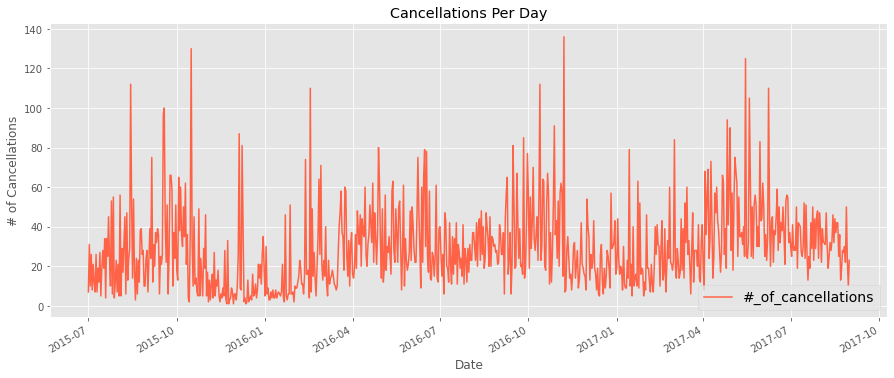

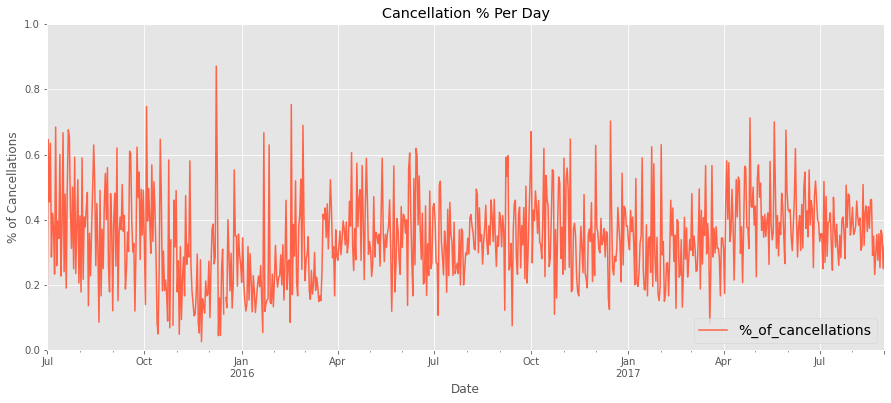

In [17]:
train_with_label_transformed = pd.DataFrame(date_Transformer.fit_transform(train_with_label),index=train_with_label.index)

# Plot Cancellations by date 
plt.figure(figsize=(15, 6))
train_with_label_transformed[train_with_label_transformed['cancelation']==True].groupby(['order_date'])['cancelation'].count().plot(label='#_of_cancellations',color='tomato')
plt.xlabel('Date')
plt.ylabel('# of Cancellations')
plt.title('Cancellations Per Day')
plt.legend(loc="lower right",fontsize=14)
plt.show()


plt.figure(figsize=(15, 6))
(train_with_label_transformed[train_with_label_transformed['cancelation']==True].groupby(['order_date'])['cancelation'].count()   /   train_with_label_transformed.groupby(['order_date'])['cancelation'].count()).plot(label='%_of_cancellations',color='tomato')
plt.ylim(0,1)
plt.xlabel('Date')
plt.ylabel('% of Cancellations')
plt.title('Cancellation % Per Day')
plt.legend(loc="lower right",fontsize=14)
plt.show()

We can see some seasonality in the data, with peaks during the winter and during the summer - typical to this industry.

<font color='royalblue'>**A(2.7)**</font>

Fit all the data on the train (Using date_Transformer & FeatureTransformer
Transforms the Train, Validation & Test)

In [18]:
x_train_with_date = pd.DataFrame(date_Transformer.fit_transform(x_train),index=x_train.index)
x_validation_with_date =  pd.DataFrame(date_Transformer.transform(x_validation),index=x_validation.index)
x_test_with_date =  pd.DataFrame(date_Transformer.transform(x_test),index=x_test.index)

In [19]:
feature_transformer = FeatureTransformer()

x_train_transformed = pd.DataFrame(feature_transformer.fit_transform(x_train_with_date).A,index=x_train_with_date.index,columns=feature_transformer.get_feature_names())
x_validation_transformed =  pd.DataFrame(feature_transformer.transform(x_validation_with_date).A,index=x_validation_with_date.index,columns=feature_transformer.get_feature_names())
x_test_transformed =  pd.DataFrame(feature_transformer.transform(x_test_with_date).A,index=x_test_with_date.index,columns=feature_transformer.get_feature_names())

## Outlier Removal

<font color='royalblue'>**A(2.1)**</font> 

We have tried running with/without outlier removal, and achieved better results once removing 5% of the data.
The method we used for removing outliers is called <font color='blue'>Isolation Forest</font> (F. T. Liu and K. M. Ting, “Isolation Forest,” 2008,[Link to paper](https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf?q=isolation-forest)).

This unsupervised method is similar in principle to Random Forest in a way that it selects a feature and splits by it. Anomalies are identified by having shorter path lengths than other observations (Example is shown below).This method is used widely due to its high-quality, fast anomaly detection and smaller memory requirement.

![image.png](https://d3i71xaburhd42.cloudfront.net/c321685dd03fa1a54e99b4c046950b96c3b0f040/3-Figure2-1.png)

In [20]:
from sklearn.ensemble import IsolationForest

print('Size of x_train_transformed & y_train, Before outlier removal:',x_train_transformed.shape, y_train.shape)


# Removing 5% of the records using Isolation Forest - an unsupervised learning algorithm for anomaly detection that works on the principle of isolating anomalies
clf_IsolationForest = IsolationForest(n_estimators=120,
                                      contamination=0.05,random_state=711)

clf_IsolationForest.fit(x_train_transformed)
y_outlier = clf_IsolationForest.predict(x_train_transformed)

# select all rows that are not outliers
mask = y_outlier != -1
x_train_transformed, y_train = x_train_transformed.iloc[mask, :], y_train.iloc[mask]
# summarize the shape of the updated training dataset
print('Size of x_train_transformed & y_train, After outlier removal:',x_train_transformed.shape, y_train.shape)

Size of x_train_transformed & y_train, Before outlier removal: (62679, 282) (62679, 1)
Size of x_train_transformed & y_train, After outlier removal: (59545, 282) (59545, 1)


# Feature Selection

<font color='royalblue'>**A(2.4)**</font> - Data Dimensionality

The given dataset has 33 features, 14 of them are anonymous, with over 89,000 samples.
After Train/Validation split, and Feature engineering & transformations, the entire training set consists of ~60K Records and 279 features. Although data is high-dimensional (due to the number of features), there are enough training samples so that data is not sparse and we are *not* suffering from the Curse of Dimensionality.

The Curse of Dimensionality refers to various problems when working with high-dimensional data. some of those potential issues
([Yiu, 2019](https://towardsdatascience.com/the-curse-of-dimensionality-50dc6e49aa1e),
[Bilogur, 2018](https://www.kaggle.com/residentmario/curse-of-dimensionality)):


    * In general, having more features than observations could risk overfitting the model. We will be able to spot overfitting when the error on the training data decreases to a very small value but the error on new data (for example, our validation set) results in a large error value.
    * Problems with clustering the data as each observation appear equidistant from all the others. This also affects other distance-based algorithms such as KNN.
    * Moreover, it is important to note that usually model explainability decreases when increasing the number of features.
    
To solve the data dimensionality problem, we could reduce the number of features by using Feature selection methods (such as Permutation Importance, or RF Importance which is used below), or dimensionality reduction techniques such as PCA, UMAP or Backward feature elimination.

<font color='royalblue'>**A(2.5)**</font>

In [21]:
# Adding 3 random features to our data - we will use features that score higher than the random ones.

# Binary random feature
x_train_transformed.insert(x_train_transformed.shape[1],'random_binary',np.random.randint(0,2,size = len(x_train_transformed)))

# Uniform between 0 to 1
x_train_transformed.insert(x_train_transformed.shape[1],'random_uniform',np.random.uniform(0.0,1.0,size = len(x_train_transformed)))

# Integer random feature
x_train_transformed.insert(x_train_transformed.shape[1],'random_int',np.random.randint(0,10,size = len(x_train_transformed)))

x_train_transformed.head()

fixed__time_until_order  num_cat__order_year  \
105769                    150.0               2017.0   
22660                       1.0               2016.0   
101637                     20.0               2016.0   
3406                       44.0               2015.0   
846                        10.0               2015.0   

        num_cat__order_month_num  num_cat__order_month_sin  \
105769                       2.0              8.660254e-01   
22660                        3.0              1.000000e+00   
101637                      11.0             -5.000000e-01   
3406                        12.0             -2.449294e-16   
846                          8.0             -8.660254e-01   

        num_cat__order_month_cos  num_cat__order_week_num  \
105769              5.000000e-01                      7.0   
22660               6.123234e-17                     14.0   
101637              8.660254e-01                     46.0   
3406                1.000000e+00                     49.0   
846                -5.000000e-01                     31.0   

        num_cat__order_week_sin  num_cat__order_week_cos  \
105769                 0.748511                 0.663123   
22660                  0.992709                -0.120537   
101637                -0.663123                 0.748511   
3406                  -0.354605                 0.935016   
846                   -0.568065                -0.822984   

        num_cat__order_day_sin  num_cat__order_day_cos  ...  \
105769                0.222521               -0.974928  ...   
22660                -0.201299                0.979530  ...   
101637                0.587785               -0.809017  ...   
3406                  0.848644                0.528964  ...   
846                   0.201299                0.979530  ...   

        anon__anon_feat_7  anon__anon_feat_8  anon__anon_feat_9  \
105769                0.0                1.0                0.0   
22660                 0.0                0.0                1.0   
101637                0.0                0.0                0.0   
3406                  0.0                0.0                1.0   
846                   0.0                0.0                1.0   

        anon__anon_feat_10  anon__anon_feat_11  anon__anon_feat_12  \
105769            0.275862           12.253004                 1.0   
22660             0.522356            1.704444                 0.0   
101637            0.353912            4.609637                 1.0   
3406              0.407632            6.755038                 1.0   
846               0.523251            3.609481                 1.0   

        anon__anon_feat_13  random_binary  random_uniform  random_int  
105769                 0.0              0        0.832427           4  
22660                  0.0              1        0.421720           1  
101637                 0.0              0        0.413580           9  
3406                   0.0              0        0.331722           7  
846                    0.0              1        0.089648           4  

[5 rows x 285 columns]

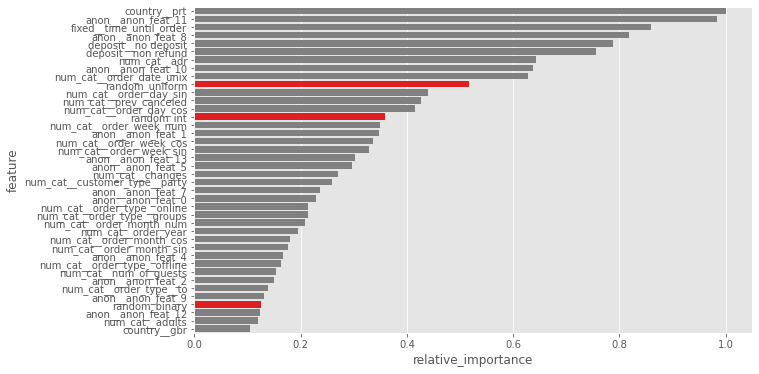

In [22]:
forestImportance = RandomForestClassifier(n_estimators=100)
forestImportance.fit(x_train_transformed, y_train.values.ravel())
feature_importance = forestImportance.feature_importances_  

forest_importance_df = pd.DataFrame(list(zip(x_train_transformed.columns, feature_importance / feature_importance.max())), columns=['feature', 'relative_importance']).sort_values('relative_importance', ascending=False)

top_i = 40 # Choose how many features we want to plot
# Features in red are the random features we've created for comparison during feature importance
clrs = ['red' if ('random' in x) else 'gray' for x in forest_importance_df.feature]
sns.barplot(data=forest_importance_df.iloc[0:top_i,:],x="relative_importance", y="feature",palette=clrs)
plt.show()

In [23]:
x_train_transformed.drop(['random_binary','random_uniform','random_int'],axis=1,inplace=True)

forest_importance_features = forest_importance_df[forest_importance_df['relative_importance']> forest_importance_df[forest_importance_df['feature']=='random_binary']['relative_importance'].values[0]].feature
forest_importance_features = forest_importance_features[~forest_importance_features.str.contains('random')] #27 features
all_features = list(x_train_transformed.columns)# 282 features

# For baseline model
top_5_feat = forest_importance_features[0:5]
top_5_feat

237               country__prt
279         anon__anon_feat_11
0      fixed__time_until_order
276          anon__anon_feat_8
119        deposit__no deposit
Name: feature, dtype: object

# Modeling

## Normalization

<font color='royalblue'>**A(2.2)**</font>


Data normalization gets rid of a number of anomalies that can make analysis of the data more complicated ([Link to article](https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029)). Specifically, different scaling methods could have a far greater influence on the results or analytics. Normalization, for instance, can remove the risk of this kind of bias ([Link to article](https://online.datasciencedojo.com/blog/importance-of-data-normalization-prior-to-analytics)).

By observing the data, it seems that it is not normalized. As some of our features have different ranges, it is important to normalize for at least some of our models. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.For example, in our training set, the number of children ranges from 0-3 per reservation and ADR ranges from 0-42625. If we would use them in KNN, for example, the distance in ADR would have much more affect as its range is significantly larger.


However, not all models require normalization, for example, we use Random Forest which does not require normalization. This because one feature is never compared in magnitude to other features, and thus, the ranges don't matter. 
In addition, in theory, Neural Networks do not require normalizing the data, but In theory, practice has shown that when numeric x-data values are normalized, neural network training is often more efficient.

In short, although not all models require normalization, we will use the normalized training data for all of our models.

In [24]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(x_train_transformed)

x_train_norm = pd.DataFrame(min_max_scaler.transform(x_train_transformed), columns=x_train_transformed.columns)
x_validation_norm =  pd.DataFrame(min_max_scaler.transform(x_validation_transformed), columns= x_validation_transformed.columns)
x_test_norm =  pd.DataFrame(min_max_scaler.transform(x_test_transformed), columns= x_test_transformed.columns, index=x_test_transformed.index)

## Baseline model
We'll develop a simple rule-based algorithm as a baseline using a Decision Tree with just the top 5 features in the RF feature importance (For simplicity purposes).

We will use this baseline to compare the performance of our more-complex models

Best parameters are: {'criterion': 'gini', 'max_depth': 3}
AVG Train AUC: 0.768


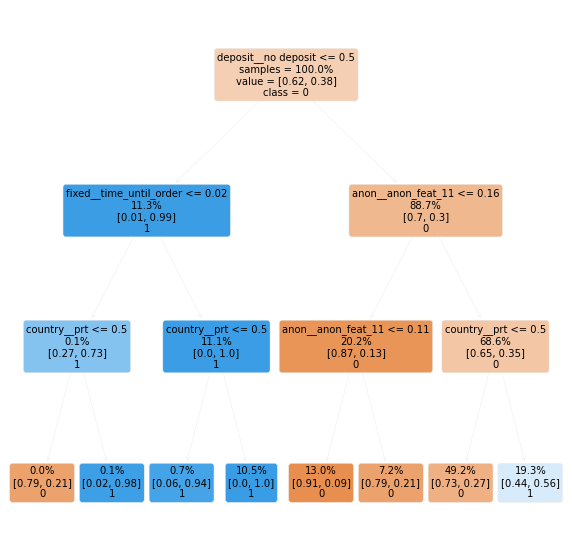

Validation AUC: 0.767
Validation Accuracy: 0.752


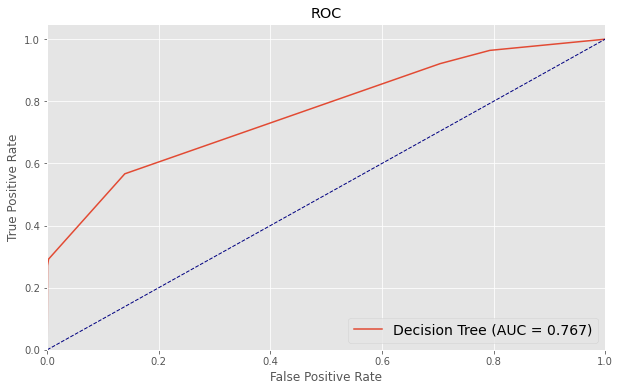

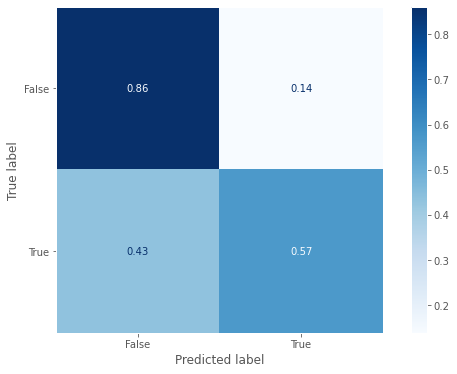

In [25]:
classifier = DecisionTreeClassifier
params = {'max_depth':[3], 'criterion':['gini','entropy']}
clf_model = GridSearchCV(classifier(), param_grid=params, scoring = 'roc_auc', cv=5,n_jobs=-1)
clf_model.fit(x_train_norm[top_5_feat], y_train.values.ravel())

# Run the model with the best parameters
best_params = clf_model.best_params_
print('Best parameters are: {}'.format(best_params))
print('AVG Train AUC: {:.3f}'.format(clf_model.best_score_))                     

model_for_pred = classifier(**best_params)

model_for_pred.fit(x_train_norm[top_5_feat],y_train.values.ravel())


fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(model_for_pred,rounded=True,filled=True,precision=2,proportion= True,label='root',class_names=['0','1'],impurity=False,feature_names=x_train_norm[top_5_feat].columns, fontsize=10)
plt.show()



y_pred = model_for_pred.predict_proba(x_validation_norm[top_5_feat])[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_validation, y_pred, pos_label=1)
auc = metrics.auc(fpr,tpr)
accuracy_score = metrics.accuracy_score(y_validation, np.round(y_pred))
print('Validation AUC: {:.3f}'.format(auc))                     
print('Validation Accuracy: {:.3f}'.format(accuracy_score))
#----- Plots -----

# Plot ROC
lw=1
plt.figure()
plt.plot(fpr,tpr,label='Decision Tree (AUC = {:.3f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right",fontsize=14)
plt.show()

# Plot Confusion Matrix
metrics.plot_confusion_matrix(model_for_pred,x_validation_norm[top_5_feat],y_validation,cmap=plt.cm.Blues, normalize='true')

plt.grid(False)

Regarding the step above, we tested a basic model including the top five features that were selected using the Random Forest Importance method (in the Feature Selection step). Using this method, we recieved an average validation AUC of 0.767 and a validation accuracy of 0.752. This in contrast to the raw probability derived from the data's distribution (that is 0.63). It can be inferred that using the baseline model solely, already improves the prediction ability.

## Prediction

<font color='royalblue'>**A(3.1) + A(3.2)**</font> 


We will examine 4 models:
- Logistic Regression
- KNN
- Random Forest
- Multi-layer Perceptron (NN)

Process:
1. We will run each model twice - once with the subset of features selected in 5.1, and once with all features
2. Maximizing AUC is the main metric -> parameters are chosen to maximize AUC 
3. Parameters for each classifier are chosen using gridsearch on 5-folds of the training data
4. Then, we run each classifier with the chosen parameters on the validation data (an unseen subset of the data given during training)
5. The classifier with the best results on the "test" is chosen for the final prediction

------------------------------
<font color='royalblue'>**A(4.1)**</font>

Confusion Matrix:

a table with 4 different combinations of predicted and actual values.
It is extremely useful for measuring Recall, Precision, Specificity, Accuracy and most importantly AUC-ROC Curve.

![image.png](https://miro.medium.com/max/356/1*Z54JgbS4DUwWSknhDCvNTQ.png)

The combinations are:
    - True Positive  (TP): correctly predicted event values
    - False Positive (FP): incorrectly predicted event values
    - True Negative  (TN): correctly predicted no-event values
    - False Negative (FN): incorrectly predicted no-event values
In our case - we predict whether a reservation was cancelled (label=True). The order of our confusion matrix is a bit different than in the image above, but the notion is the same. The rows show the True label (in reality) and the column show the predicted label of the model. Thus, if our model predicts True and is correct, this will be counted as a TP (0.57 in the baseline model above). If it mistakenly predicts True then it is counted as a FP (0.14 in the baseline model above). 

To construct each model's receiver operating characteristic (ROC) curve, we will calculate the following:
- Recall/True Positive Rate (TPR): 
$$TPR = \frac{TP}{TP+FN}$$
- False Positive Rate (FPR): 
$$FPR = \frac{FP}{FP+TN}$$
   

In the following steps, we will implement a confusion matrix per each one of the selected models above to
test for overfitting of the data within those models.

In [26]:
# Model configurations
model_clf = {'Logistic Regression': LogisticRegression,
             'KNN': KNeighborsClassifier,
             'Random Forest': RandomForestClassifier,
             'MLPClassifier': MLPClassifier,
                }

# Parameters for each classifier
param_dist = {
                'Logistic Regression':
                {
#                     'C': [0.01, 0.1, 1, 100, 1000], #Inverse regularization parameter, large C means less regularization.
                    'C': [1, 100,1000], # We have examined a larget range of Cs, but to save runtime we will explore these 3 which produced better results
                    'penalty': ['l1','l2'], # the norm used in the penalization
                    'max_iter': [100], # Maximum number of iterations taken for the solvers to converge
                    'solver': ["liblinear"] # Algorithm to use in the optimization problem, 'liblinear' performs better on smaller datasets
                },
                
                'KNN':
                {
#                     'n_neighbors': [3,5,7,9],  # Number of neighbors. We specifically choose odd numbers so there would always be a tie-breaker
#                     'weights': ['uniform', 'distance'], #weight function used in prediction. In ‘uniform’ - All points in each neighborhood are weighted equally. In ‘distance’ - weight points by the inverse of their distance.
                    # To save runtime, we chose for the final run a minimal number of parameters:
                    'n_neighbors': [7,9], 
                    'weights': ['distance'], #To save runtime - we only choose the 'distance' function as it produced better results on our training set 
         
                },
    
                'Random Forest': 
                {
                    'n_estimators':[51,101,151], # The number of trees in the forest
                    'min_samples_split':[5],     # The minimum number of samples required to split an internal node
#                     'max_depth':[12,25,None],    # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
                    'max_depth':[25,None],    # To Save final runtime, we chose these values which produced the best results
#                     'max_features':["auto",22,28], # The number of features to consider when looking for the best split
                    'max_features':["auto",28], # To Save final runtime, we chose these values which produced the best results
                    'bootstrap':[True]           # Whether bootstrap samples are used when building trees
                 },
                 'MLPClassifier': 
                {
                    'hidden_layer_sizes':[(len(all_features),),(len(forest_importance_features),20,10)], # The number of neuorons in each layer
                    'activation':['logistic','relu'],                   # Activation function of the hidden layer
                    'max_iter':[120]                                    # Maximum number of iterations
                    # Optimization on the training data does not converge at this maximum number of iterations, but we chose this to save runtime.
                    # 'max_iter':[100,120,150,200]
                 },
            }

<font color='royalblue'>**A(3.) + A(4.)**</font>

*******************************************
Classifier name: Logistic Regression
num_of_features: 34
Best parameters are: {'C': 1000, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
AVG Train AUC: 0.889
Validation AUC: 0.890
Validation Accuracy: 0.813


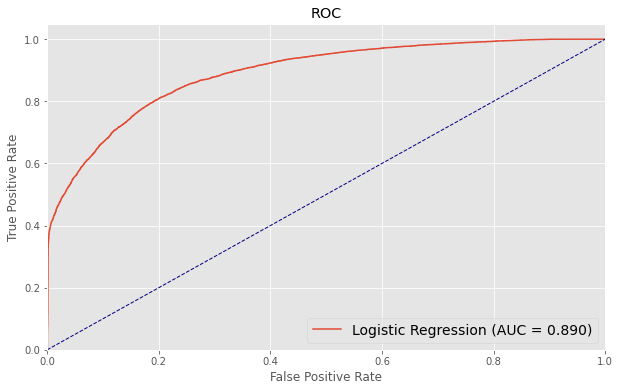

*******************************************
Classifier name: Logistic Regression
num_of_features: 282
Best parameters are: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
AVG Train AUC: 0.905
Validation AUC: 0.907
Validation Accuracy: 0.831


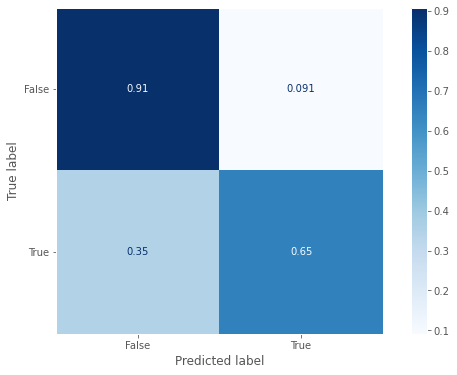

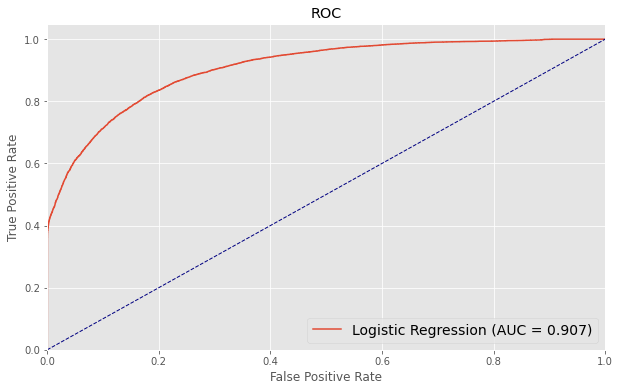

*******************************************
Classifier name: KNN
num_of_features: 34
Best parameters are: {'n_neighbors': 9, 'weights': 'distance'}
AVG Train AUC: 0.892
Validation AUC: 0.897
Validation Accuracy: 0.826


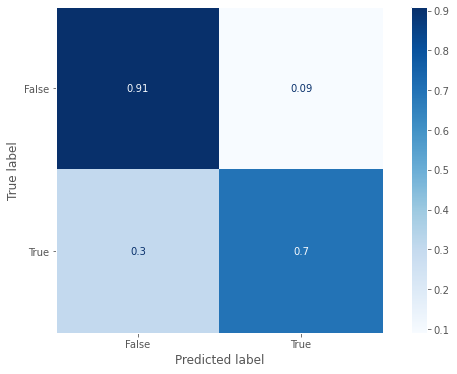

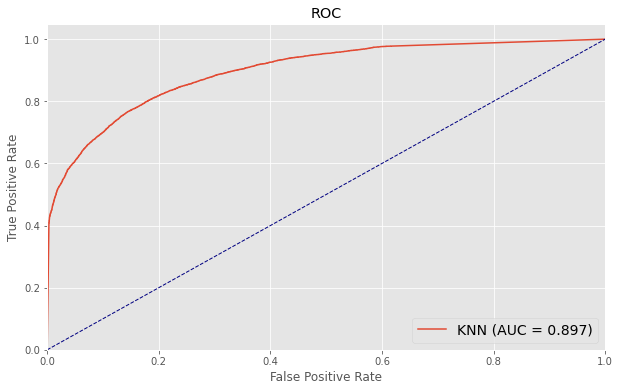

*******************************************
Classifier name: KNN
num_of_features: 282
Best parameters are: {'n_neighbors': 9, 'weights': 'distance'}
AVG Train AUC: 0.876
Validation AUC: 0.882
Validation Accuracy: 0.809


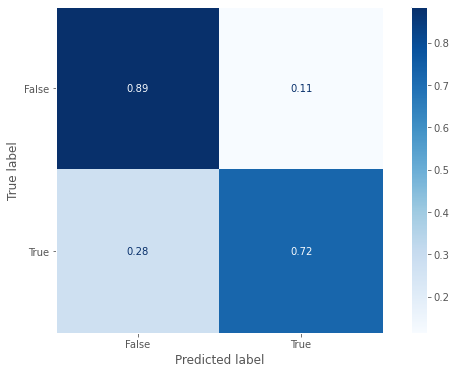

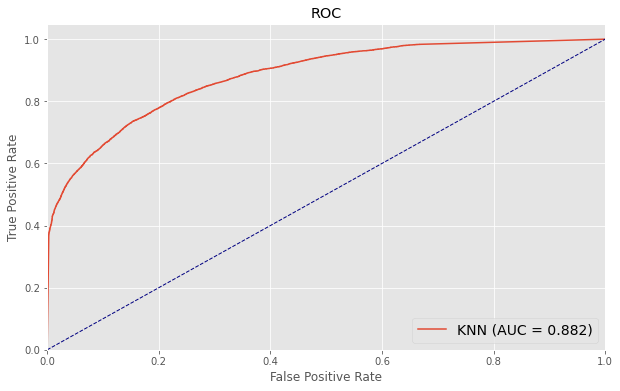

*******************************************
Classifier name: Random Forest
num_of_features: 34
Best parameters are: {'bootstrap': True, 'max_depth': 25, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 151}
AVG Train AUC: 0.939
Validation AUC: 0.940
Validation Accuracy: 0.872


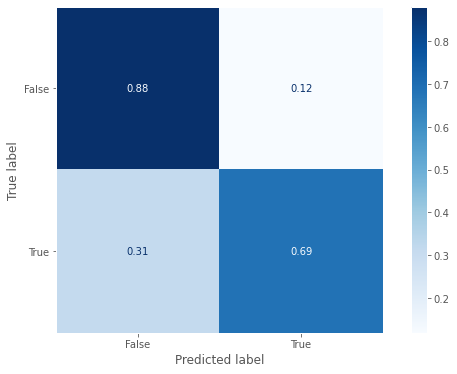

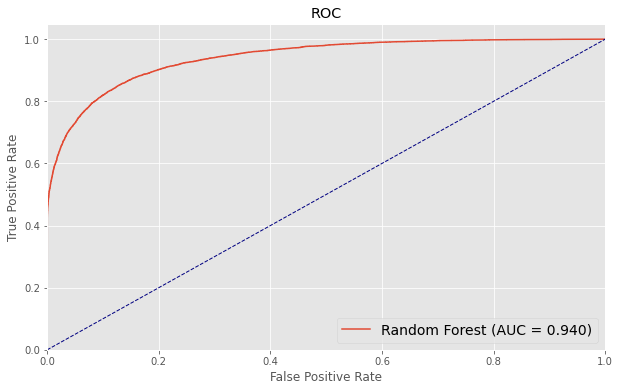

*******************************************
Classifier name: Random Forest
num_of_features: 282
Best parameters are: {'bootstrap': True, 'max_depth': None, 'max_features': 28, 'min_samples_split': 5, 'n_estimators': 151}
AVG Train AUC: 0.945
Validation AUC: 0.947
Validation Accuracy: 0.881


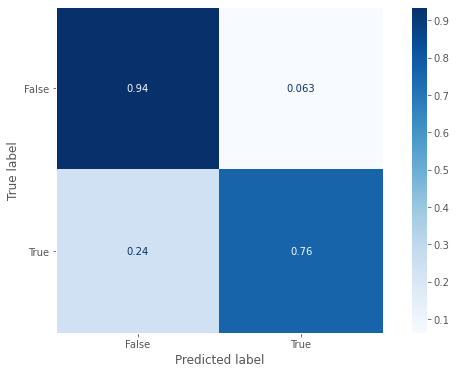

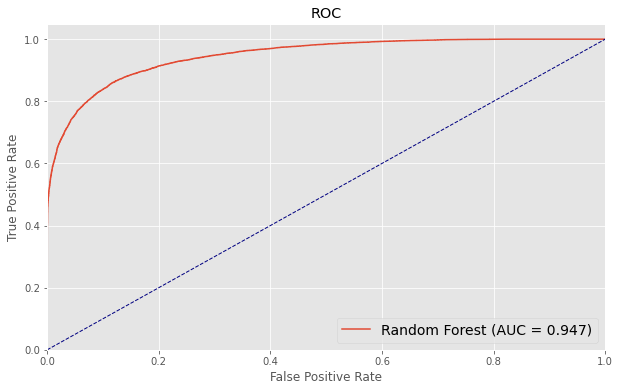

*******************************************
Classifier name: MLPClassifier
num_of_features: 34


/Users/linb/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters are: {'activation': 'relu', 'hidden_layer_sizes': (282,), 'max_iter': 120}
AVG Train AUC: 0.930


/Users/linb/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation AUC: 0.932
Validation Accuracy: 0.858


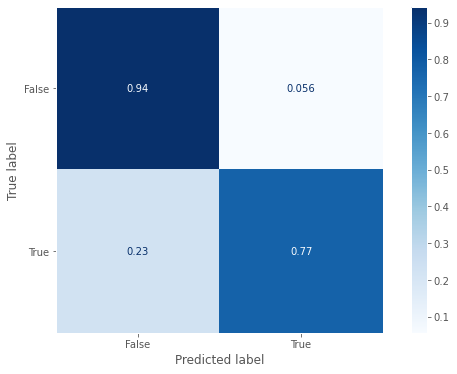

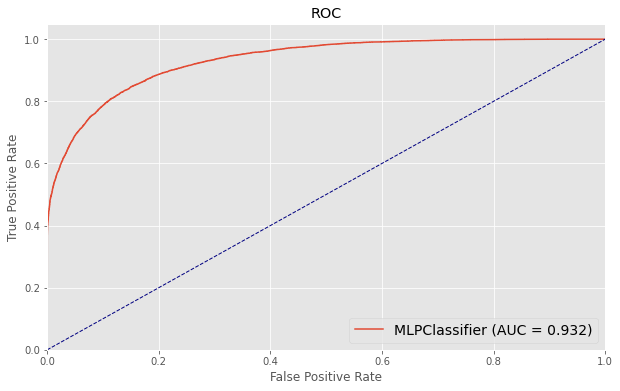

*******************************************
Classifier name: MLPClassifier
num_of_features: 282


/Users/linb/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters are: {'activation': 'relu', 'hidden_layer_sizes': (282,), 'max_iter': 120}
AVG Train AUC: 0.933


/Users/linb/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation AUC: 0.934
Validation Accuracy: 0.859


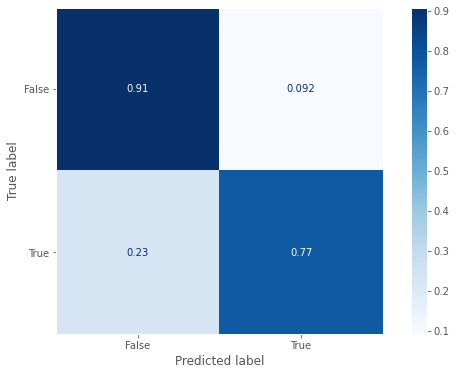

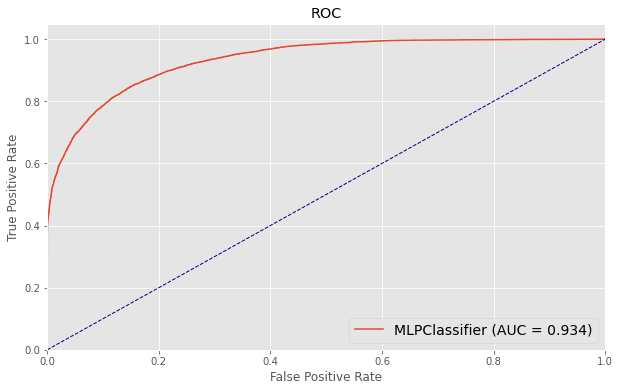

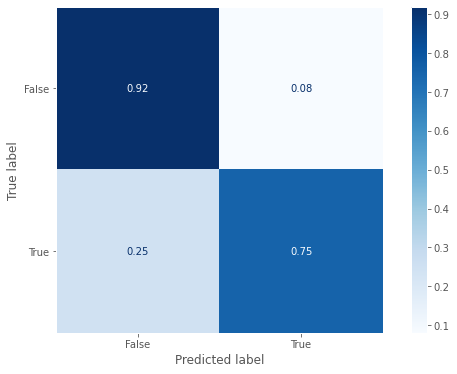

In [27]:
# -- Long runtime --
best_params_per_model = {}
y_pred_dict_per_model = {} # Saving the prediction of each model so we could show all ROC curves  in one plot

for classifier_name in model_clf:
    for feat_group in (forest_importance_features,all_features):
        print('*******************************************')
        print ('Classifier name:', classifier_name)
        print ('num_of_features:',len(feat_group))

        classifier = model_clf[classifier_name]
        params = param_dist[classifier_name]
        clf_model = GridSearchCV(classifier(), param_grid=params, scoring = 'roc_auc', cv=5,n_jobs=-1)
        clf_model.fit(x_train_norm[feat_group], y_train.values.ravel())

        # Run the model with the best parameters
        best_params = clf_model.best_params_
        print('Best parameters are: {}'.format(best_params))
        print('AVG Train AUC: {:.3f}'.format(clf_model.best_score_))                     

        model_for_pred = classifier(**best_params)

        model_for_pred.fit(x_train_norm[feat_group],y_train.values.ravel())
        y_pred = model_for_pred.predict_proba(x_validation_norm[feat_group])[:,1]
        
        y_pred_dict_per_model[(classifier_name,len(feat_group))] = y_pred

        
        fpr, tpr, thresholds = metrics.roc_curve(y_validation, y_pred, pos_label=1)
        auc = metrics.auc(fpr,tpr)
        accuracy_score = metrics.accuracy_score(y_validation, np.round(y_pred))
        print('Validation AUC: {:.3f}'.format(auc))                     
        print('Validation Accuracy: {:.3f}'.format(accuracy_score))
        best_params_per_model[(classifier_name,len(feat_group))] = best_params
        #----- Plots -----
        # Plot ROC
        lw=1
        plt.figure()
        plt.plot(fpr,tpr,label='{} (AUC = {:.3f})'.format(classifier_name,auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC')
        plt.legend(loc="lower right",fontsize=14)
        plt.show()

        # Plot Confusion Matrix
        metrics.plot_confusion_matrix(model_for_pred,x_validation_norm[feat_group],y_validation,cmap=plt.cm.Blues, normalize='true')

        plt.grid(False)

the nearest neigbor search in high-dimensional spaces is somewhat affected by the curse of dimensionality, making it harder for two specific points to be close to each other in every axis. That's probably why results are better on the smaller set of features compared to on all features.

<font color='royalblue'>**A(4.3)**</font>

In terms of overfitted data, once we ran the cross validation per each one of the models (using K-NN) we can determine that none of the models we have tested are overfitted, and it can be supported by the average train AUC and validation AUC results that are quite similar, indicating the validation results are not overfitted.  

In general, in order to solve the data dimensionality problem, we could reduce the number of features by using Feature selection methods (such as Permutation Importance, or RF Importance which is used below), or dimensionality reduction techniques such as PCA, UMAP or Backward feature elimination.


Plotting all ROC-AUC curves together (for each model, plot the model which produced the better results)

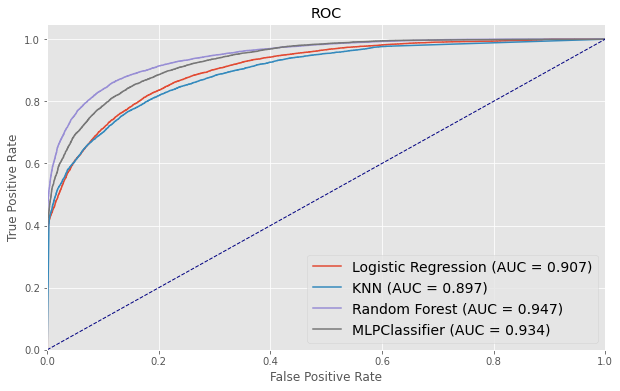

In [28]:
lw=1
plt.figure()
    
for classifier_name,num_of_features in y_pred_dict_per_model.keys():
    if num_of_features == len(forest_importance_features): # Plot
        y_pred = y_pred_dict_per_model[(classifier_name,num_of_features)]
        fpr, tpr, thresholds = metrics.roc_curve(y_validation, y_pred, pos_label=1)
        auc = metrics.auc(fpr,tpr)

    else:
        y_pred = y_pred_dict_per_model[(classifier_name,num_of_features)]
        fpr_all_feats, tpr_all_feats, thresholds = metrics.roc_curve(y_validation, y_pred, pos_label=1)
        auc_all_feats =  metrics.auc(fpr_all_feats,tpr_all_feats)
        if auc_all_feats >= auc:
            plt.plot(fpr_all_feats,tpr_all_feats,label='{} (AUC = {:.3f})'.format(classifier_name,auc_all_feats))
        else:
            plt.plot(fpr,tpr,label='{} (AUC = {:.3f})'.format(classifier_name,auc))
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right",fontsize=14)
plt.show()

# Final Prediction

The chosen model is Random Forest on all features (282) with the following parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 28, 'min_samples_split': 5, 'n_estimators': 151}

In [29]:
# Concat Train & Validation so we the model could train on the entire training set

x_train_and_validation_norm = np.concatenate((x_train_norm,x_validation_norm))
y_train_and_validation = np.concatenate((y_train,y_validation)).ravel()

# Train model on all training data
model = RandomForestClassifier (**best_params_per_model['Random Forest',282])
model.fit(x_train_and_validation_norm,y_train_and_validation)
y_pred = model.predict_proba(x_test_norm)

final_pred = pd.DataFrame(y_pred[:,1],columns=['cancel_proba'],index=x_test_norm.index)

final_pred.to_csv('Submission_group_13.csv', index=True, header=True)

In [30]:
from datetime import datetime
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

'2021-06-12 22:32:03'

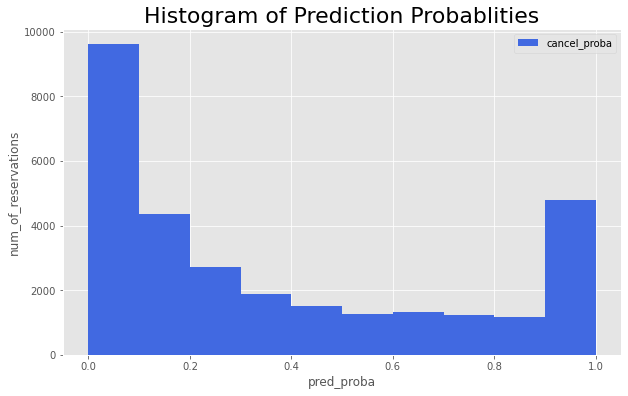

In [31]:
final_pred.plot.hist(bins=10, color='royalblue')
plt.title('Histogram of Prediction Probablities', fontsize=22)
plt.xlabel('pred_proba')
plt.ylabel("num_of_reservations")
plt.show()